# **Covid-19 Confirmed Case Data**

## **1.0 Introduction**
The COVID-19 pandemic prompted a global need for predictive systems to identify individuals at risk based on symptoms and behavioral patterns. Predictive modeling using machine learning can help in early identification and prevention of disease spread. This project leverages a dataset containing health symptoms and behavior features to predict COVID-19 infection using classification models.

## **2.0 Dataset Overview**
- **Features**: 20 binary predictors including:
  - Symptoms: `Breathing Problem`, `Fever`, `Dry Cough`, `Sore throat`
  - Comorbidities: `Asthma`, `Diabetes`, `Heart Disease`
  - Exposure: `Contact with COVID patients`,`Abroad travel`
  - Prevention: `Wearing Masks` (note: all "No" in dataset)

- **Target**: COVID-19 (Positive/Negative)
- **Size**: 1085 patient records
- **Data Issues**: 
  - Inconsistent values (e.g., 0/1/YES/NO in Heart Disease)
  - Features with no variance (`Wearing Masks`, `Sanitization`)

## **3.0 Import Data**

In [67]:
import pandas as pd

raw_df = pd.read_csv("https://github.com/IzamAriff/BDA_PROJECT/raw/e11221777ce7a1f44ad9c9e5774a0d5d49fd07fd/Covid-19_Confirmed_Case_Prediction.csv")

raw_df.head(10)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,...,No,Yes,No,No,No,No,No,No,No,Yes
1,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,...,Yes,No,No,Yes,No,Yes,Yes,No,No,Yes
2,No,No,No,No,No,No,Yes,Yes,No,No,...,Yes,Yes,No,No,No,No,No,No,No,No
3,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,...,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes
4,No,No,No,No,Yes,Yes,Yes,No,Yes,No,...,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No
5,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,...,Yes,Yes,Yes,Yes,No,No,No,No,No,Yes
6,Yes,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,Yes,Yes,No,Yes,No,Yes,No,No,No,Yes
7,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,...,No,No,No,No,Yes,No,Yes,No,No,Yes
8,Yes,No,No,No,No,No,No,Yes,Yes,No,...,No,No,No,Yes,Yes,Yes,No,No,No,Yes
9,No,Yes,No,No,No,No,Yes,Yes,No,No,...,No,No,No,No,No,No,Yes,No,No,No


## **4.0 Dataset Analysis**

### 4.1 Missing Value Counts



Dataset Info (data types, non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension 

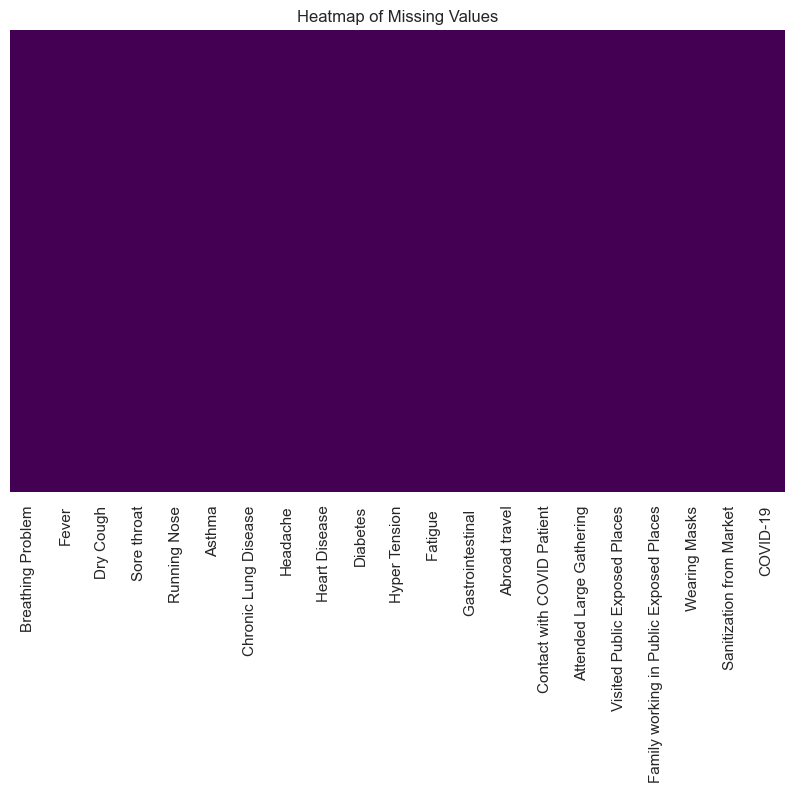

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("\n\nDataset Info (data types, non-null counts):")
raw_df.info()

print("\n\nDescriptive Statistics for numerical columns:")
print(raw_df.describe())

print("\n\n--- 2. Missing Value Analysis ---")
missing_values = raw_df.isnull().sum()
missing_percentage = (missing_values / len(raw_df)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})
print("\nMissing values per column:")
print(missing_info[missing_info['Missing Count'] > 0])

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(raw_df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()

### 4.2 Outlier Identification 

In [69]:

try:
    print("Successfully loaded the dataset.")
    print(f"Dataset shape: {raw_df.shape}")
except FileNotFoundError:
    raw_df = pd.DataFrame() 

# --- Step 2: Systematically find ALL unique values to spot anomalies ---
if not raw_df.empty:
    print("\nChecking for all unique values in each column \n")
    for col in raw_df.columns:
        unique_values = raw_df[col].unique()
        # Only print columns that have more than just 'Yes' and 'No'
        if not set(unique_values).issubset({'Yes', 'No'}):
            print(f"Column '{col}' has unusual values: {unique_values}")

# --- Step 3: Define a function to find rows with specific invalid values ---
def find_anomalous_rows(df, columns_to_check, invalid_values):

    invalid_values_set = set(invalid_values)

    # isin is more efficient for this task
    outlier_mask = df[columns_to_check].isin(invalid_values_set).any(axis=1)
        
    return df[outlier_mask]

if not raw_df.empty:

    anomalous_values = [0, 1, '0', '1', 'NOT', 'YE']

    all_columns = raw_df.columns.tolist()

    outlier_rows = find_anomalous_rows(raw_df, all_columns, anomalous_values)

    print("\nIdentified 'Outlier' Rows \n")

    if outlier_rows.empty:
        print("No rows found with the specified anomalous values.")
    else:
        print(f"Found {len(outlier_rows)} rows containing one of {anomalous_values}:")
        # Display the specific rows so you can inspect them
        print(outlier_rows)

raw_df.describe()


Successfully loaded the dataset.
Dataset shape: (5434, 21)

Checking for all unique values in each column 

Column 'Headache' has unusual values: ['No' 'Yes' 'NOT']
Column 'Heart Disease' has unusual values: ['Yes' 'No' '0' '1']
Column 'Diabetes' has unusual values: ['Yes' 'No' 'YE']
Column 'Fatigue ' has unusual values: ['No' 'Yes' 'YE']
Column 'Gastrointestinal ' has unusual values: ['Yes' 'No' 'YE']
Column 'Abroad travel' has unusual values: ['No' 'Yes' 'NOT']
Column 'Contact with COVID Patient' has unusual values: ['No' 'Yes' '1' 'NOT']
Column 'Family working in Public Exposed Places' has unusual values: ['No' 'Yes' '0']

Identified 'Outlier' Rows 

Found 20 rows containing one of [0, 1, '0', '1', 'NOT', 'YE']:
     Breathing Problem Fever Dry Cough Sore throat Running Nose Asthma  \
13                 Yes   Yes       Yes         Yes           No     No   
14                  No    No       Yes          No          Yes    Yes   
15                 Yes    No       Yes         Yes   

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,...,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,3,4,3,...,3,3,3,4,2,2,3,1,1,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,...,Yes,No,No,Yes,No,Yes,No,No,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2907,2846,...,2820,2883,2982,2723,2924,2820,3169,5434,5434,4383


## **5.0 Data Cleaning**

   - Standardize binary values (`Yes`/`No` → `1`/`0`)
   - Handle inconsistent entries (e.g., `Heart Disease` "0" → "No")
   - Drop invariant features (`Wearing Masks`, `Sanitization`)

### 5.1 Replacing Outlier Value

In [70]:
clean_df = raw_df.copy()

replacement_map = {
    1: 'Yes', '1': 'Yes', 'YE': 'Yes',
    0: 'No',  '0': 'No',  'NOT': 'No'
}

clean_df.replace(replacement_map, inplace=True)

print("\n--- Verifying unique values in 'clean_df' ---")

all_columns_are_clean = True
for col in clean_df.columns:
    unique_vals = clean_df[col].unique()
    if not set(unique_vals).issubset({'Yes', 'No'}):
        print(f"!! Column '{col}' still contains unexpected values: {unique_vals}")
        all_columns_are_clean = False

if all_columns_are_clean:
    print("\nVerification successful! All columns in 'clean_df' now contain only 'Yes' or 'No'.")
    print("\n--- First 5 rows of the new 'clean_df' ---")
    print(clean_df.head())



--- Verifying unique values in 'clean_df' ---

Verification successful! All columns in 'clean_df' now contain only 'Yes' or 'No'.

--- First 5 rows of the new 'clean_df' ---
  Breathing Problem Fever Dry Cough Sore throat Running Nose Asthma  \
0                No   Yes       Yes         Yes          Yes    Yes   
1               Yes   Yes       Yes         Yes           No     No   
2                No    No        No          No           No     No   
3               Yes   Yes       Yes         Yes          Yes    Yes   
4                No    No        No          No          Yes    Yes   

  Chronic Lung Disease Headache Heart Disease Diabetes  ... Fatigue   \
0                  Yes       No           Yes      Yes  ...       No   
1                   No       No           Yes      Yes  ...      Yes   
2                  Yes      Yes            No       No  ...      Yes   
3                  Yes       No            No       No  ...      Yes   
4                  Yes       No       

### 5.2 Drop Invariant Feature (All `Yes`/`No`)

In [71]:
columns_to_drop = ['Wearing Masks', 'Sanitization from Market']

# Drop the columns from the original DataFrame
clean_df.drop(columns=columns_to_drop, axis=1, inplace=True)

print("\nDataFrame after dropping multiple columns in place:")
print(clean_df)


DataFrame after dropping multiple columns in place:
     Breathing Problem Fever Dry Cough Sore throat Running Nose Asthma  \
0                   No   Yes       Yes         Yes          Yes    Yes   
1                  Yes   Yes       Yes         Yes           No     No   
2                   No    No        No          No           No     No   
3                  Yes   Yes       Yes         Yes          Yes    Yes   
4                   No    No        No          No          Yes    Yes   
...                ...   ...       ...         ...          ...    ...   
5429               Yes    No        No         Yes          Yes    Yes   
5430                No   Yes       Yes         Yes          Yes    Yes   
5431               Yes   Yes        No         Yes           No     No   
5432                No   Yes       Yes         Yes          Yes     No   
5433               Yes   Yes       Yes         Yes           No     No   

     Chronic Lung Disease Headache Heart Disease Diabetes 

### 5.2 Standardizing Binary Values

In [72]:
# Replace 'Yes' with 1 and 'No' with 0 in the entire DataFrame
clean_df = clean_df.replace({'Yes': 1, 'No': 0})

# Confirm the conversion
clean_df.head()

clean_df.describe()

if not clean_df.empty:

    anomalous_values = ['Yes', 'No', '0', '1', 'NOT', 'YE']

    all_columns = clean_df.columns.tolist()

    outlier_rows = find_anomalous_rows(clean_df, all_columns, anomalous_values)

    print("\nIdentified 'Outlier' Rows \n")

    if outlier_rows.empty:
        print("No rows found with the specified anomalous values.")
    else:
        print(f"Found {len(outlier_rows)} rows containing one of {anomalous_values}:")
        # Display the specific rows so you can inspect them
        print(outlier_rows)



Identified 'Outlier' Rows 

No rows found with the specified anomalous values.


C:\Users\iiezu\AppData\Local\Temp\ipykernel_11452\2421530142.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clean_df = clean_df.replace({'Yes': 1, 'No': 0})


## **6.0 Exploratory Analysis**

   - Correlation heatmap to identify symptom relationships
   - Prevalence analysis of top 5 predictors in positive cases
   - Exposure history comparison (travel/contact) in infected vs. non-infected

### 6.1 Target Variable Distribution

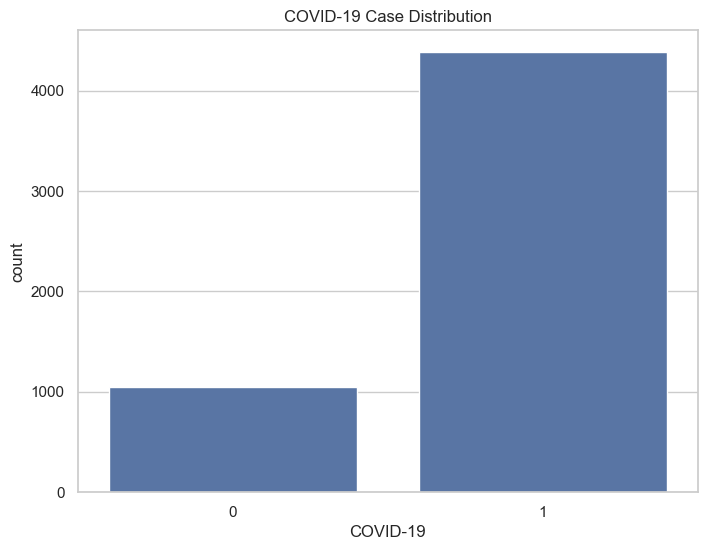

In [73]:
plt.figure(figsize=(8,6))
sns.countplot(x='COVID-19', data=clean_df)
plt.title('COVID-19 Case Distribution')
plt.show()

### 6.2 Correlation Heatmap of Variables

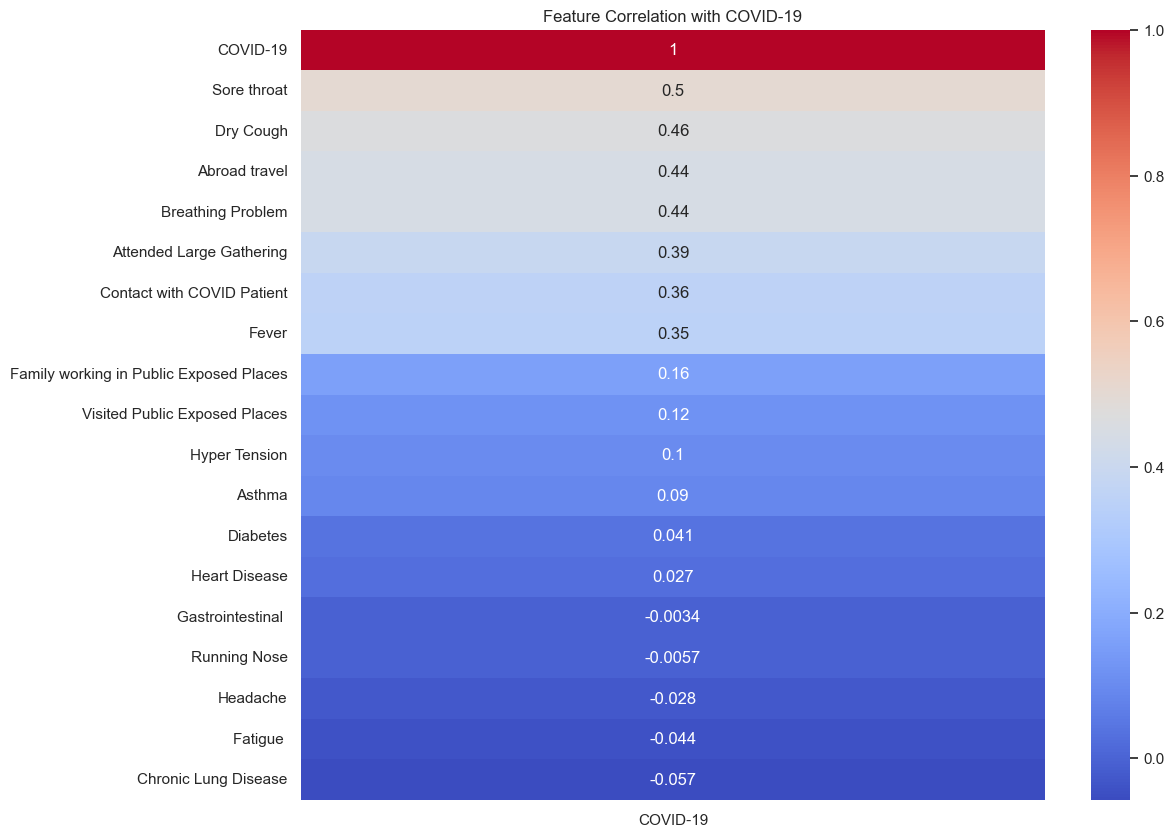

In [74]:
plt.figure(figsize=(12,10))
corr_matrix = clean_df.corr()
sns.heatmap(corr_matrix[['COVID-19']].sort_values('COVID-19', ascending=False), 
            annot=True, cmap='coolwarm')
plt.title('Feature Correlation with COVID-19')
plt.show()


### 6.3 Symptoms Prevalence Analysis 

Symptom Prevalence in Positive/Negative Cases:
COVID-19                  0         1
Fever              0.490961  0.857175
Dry Cough          0.408183  0.884782
Breathing Problem  0.238820  0.768652
Sore throat        0.270219  0.837098
Running Nose       0.549001  0.541866
Headache           0.531874  0.496692
Fatigue            0.564225  0.508328
Gastrointestinal   0.472883  0.468629


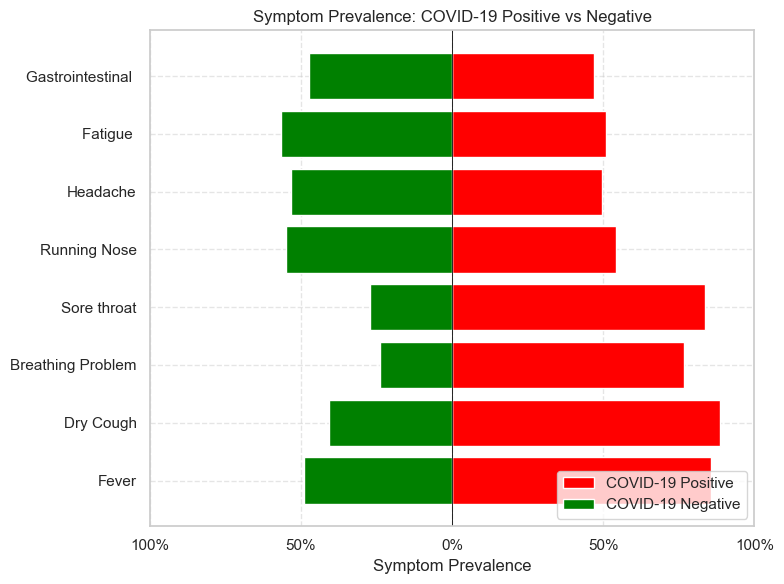

In [75]:
symptoms = ['Fever', 'Dry Cough', 'Breathing Problem', 'Sore throat', 'Running Nose', 'Headache', 'Fatigue ', 'Gastrointestinal ']

# Calculate average prevalence of each symptom for COVID-positive and negative cases
symptom_prevalence = clean_df.groupby('COVID-19')[symptoms].mean().T
print("Symptom Prevalence in Positive/Negative Cases:")
print(symptom_prevalence)

# Create butterfly chart
fig, ax = plt.subplots(figsize=(8, 6))

# Plot positive (right) and negative (left) bars
ax.barh(symptom_prevalence.index, symptom_prevalence[1], color='red', label='COVID-19 Positive')
ax.barh(symptom_prevalence.index, -symptom_prevalence[0], color='green', label='COVID-19 Negative')

# Customize axis
ax.set_xlabel('Symptom Prevalence')
ax.set_title('Symptom Prevalence: COVID-19 Positive vs Negative')
ax.legend(loc='lower right')

# Custom percentage ticks
xticks = [-1, -0.5, 0, 0.5, 1]
ax.set_xticks(xticks)
ax.set_xticklabels([f'{abs(x):.0%}' for x in xticks])

# Add center line and grid
ax.axvline(0, color='black', linewidth=0.6)
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


--- Random Forest Model Accuracy: 94.91% ---

--- Feature Importances from Random Forest ---
Breathing Problem    0.258196
Dry Cough            0.254528
Sore throat          0.205160
Fever                0.142823
Fatigue              0.039213
Gastrointestinal     0.036902
Running Nose         0.034403
Headache             0.028775
dtype: float64


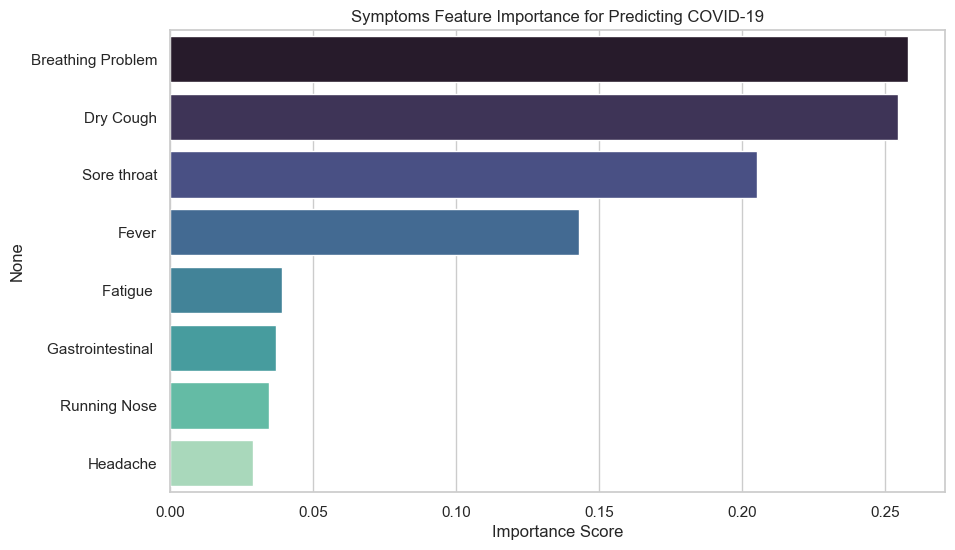

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# --- Method 2: Decision Trees and Feature Importance ---

# Define features (X) and target (y)
X = clean_df[symptoms]
y = clean_df['COVID-19']

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize and train a Random Forest Classifier
# Random Forest is a collection of decision trees and is more robust
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Check model accuracy
accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"\n--- Random Forest Model Accuracy: {accuracy:.2%} ---")

# Get feature importances
importances = pd.Series(model.feature_importances_, index=symptoms).sort_values(ascending=False)

print("\n--- Feature Importances from Random Forest ---")
print(importances)

# Visualize the importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index, palette='mako', hue = importances.index)
plt.title('Symptoms Feature Importance for Predicting COVID-19')
plt.xlabel('Importance Score')
plt.show()


### 6.4 Exposure Factor Analysis


Exposure Factor Comparison:
COVID-19                                        0         1
Abroad travel                            0.000000  0.559206
Contact with COVID Patient               0.137012  0.589094
Attended Large Gathering                 0.064700  0.557153
Visited Public Exposed Places            0.396765  0.548255
Family working in Public Exposed Places  0.254995  0.454940


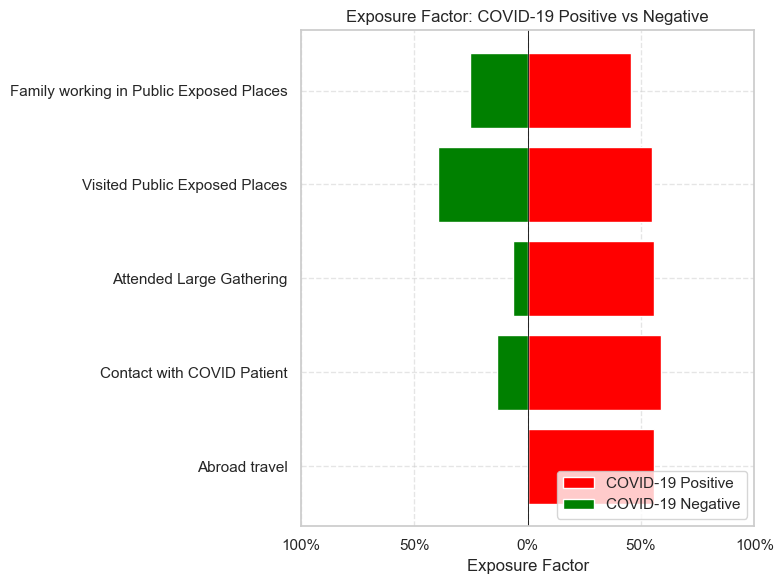

In [77]:
exposure_factors = ['Abroad travel', 'Contact with COVID Patient', 
                   'Attended Large Gathering', 'Visited Public Exposed Places', 'Family working in Public Exposed Places']
exposure_comparison = clean_df.groupby('COVID-19')[exposure_factors].mean()
print("\nExposure Factor Comparison:")
print(exposure_comparison.T)

# Create butterfly chart
fig, ax = plt.subplots(figsize=(8, 6))

# Plot positive (right) and negative (left) bars
ax.barh(exposure_comparison.T.index, exposure_comparison.T[1], color='red', label='COVID-19 Positive')
ax.barh(exposure_comparison.T.index, -exposure_comparison.T[0], color='green', label='COVID-19 Negative')

# Customize axis
ax.set_xlabel('Exposure Factor')
ax.set_title('Exposure Factor: COVID-19 Positive vs Negative')
ax.legend(loc='lower right')

# Custom percentage ticks
xticks = [-1, -0.5, 0, 0.5, 1]
ax.set_xticks(xticks)
ax.set_xticklabels([f'{abs(x):.0%}' for x in xticks])

# Add center line and grid
ax.axvline(0, color='black', linewidth=0.6)
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


--- Random Forest Model Accuracy: 91.11% ---

--- Feature Importances from Random Forest ---
Abroad travel                              0.403717
Attended Large Gathering                   0.281414
Contact with COVID Patient                 0.228732
Family working in Public Exposed Places    0.052101
Visited Public Exposed Places              0.034036
dtype: float64


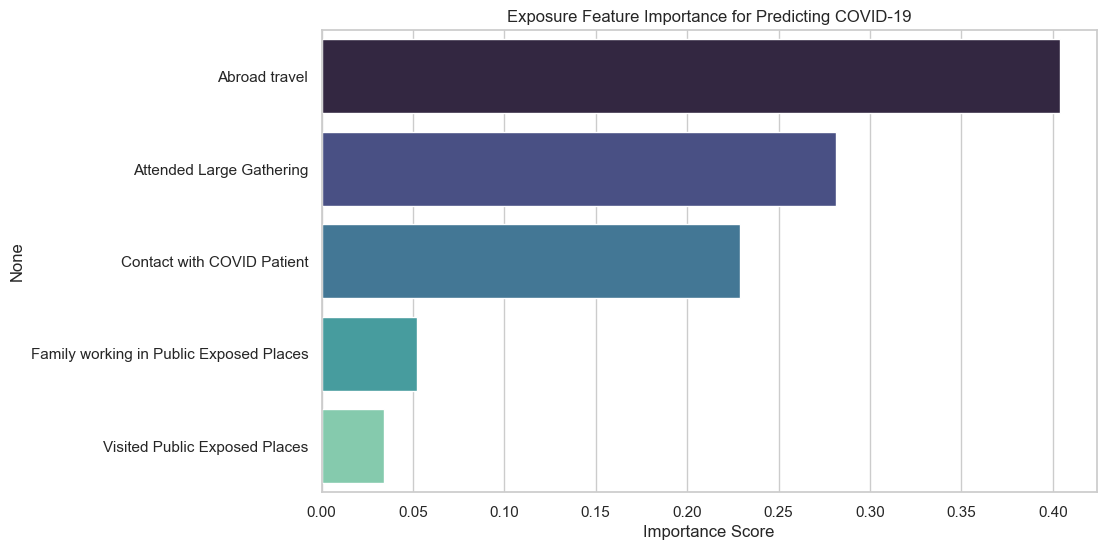

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# --- Method 2: Decision Trees and Feature Importance ---

# Define features (X) and target (y)
X = clean_df[exposure_factors]
y = clean_df['COVID-19']

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize and train a Random Forest Classifier
# Random Forest is a collection of decision trees and is more robust
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Check model accuracy
accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"\n--- Random Forest Model Accuracy: {accuracy:.2%} ---")

# Get feature importances
importances = pd.Series(model.feature_importances_, index=exposure_factors).sort_values(ascending=False)

print("\n--- Feature Importances from Random Forest ---")
print(importances)

# Visualize the importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index, palette='mako', hue = importances.index)
plt.title('Exposure Feature Importance for Predicting COVID-19')
plt.xlabel('Importance Score')
plt.show()


### 6.5 Comorbidity Analysis


Comorbidity Prevalence:
COVID-19                     0         1
Diabetes              0.434824  0.486197
Heart Disease         0.436727  0.470910
Asthma                0.371075  0.484600
Chronic Lung Disease  0.529971  0.458134
Hyper Tension         0.385347  0.515172


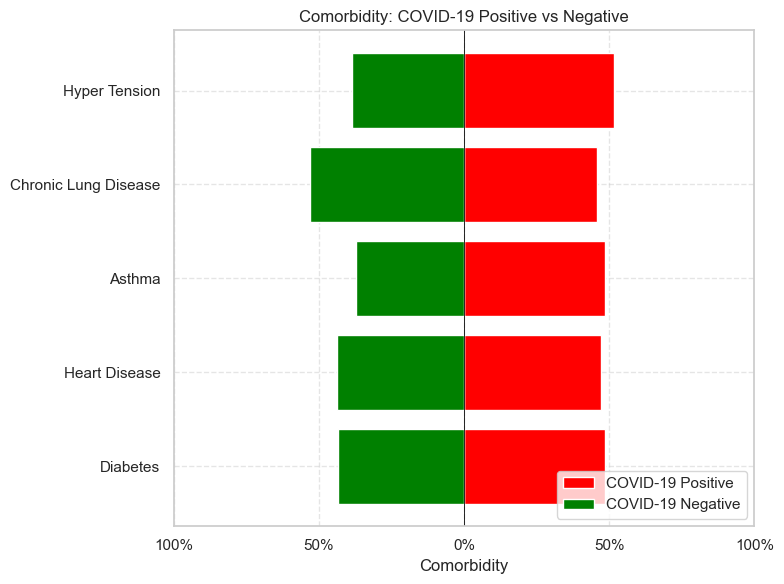

In [79]:
comorbidities = ['Diabetes', 'Heart Disease', 'Asthma', 'Chronic Lung Disease', 'Hyper Tension']
comorbidity_risk = clean_df.groupby('COVID-19')[comorbidities].mean()
print("\nComorbidity Prevalence:")
print(comorbidity_risk.T)

# Create butterfly chart
fig, ax = plt.subplots(figsize=(8, 6))

# Plot positive (right) and negative (left) bars
ax.barh(comorbidity_risk.T.index, comorbidity_risk.T[1], color='red', label='COVID-19 Positive')
ax.barh(comorbidity_risk.T.index, -comorbidity_risk.T[0], color='green', label='COVID-19 Negative')

# Customize axis
ax.set_xlabel('Comorbidity')
ax.set_title('Comorbidity: COVID-19 Positive vs Negative')
ax.legend(loc='lower right')

# Custom percentage ticks
xticks = [-1, -0.5, 0, 0.5, 1]
ax.set_xticks(xticks)
ax.set_xticklabels([f'{abs(x):.0%}' for x in xticks])

# Add center line and grid
ax.axvline(0, color='black', linewidth=0.6)
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


--- Random Forest Model Accuracy: 80.87% ---

--- Feature Importances from Random Forest ---
Chronic Lung Disease    0.291292
Diabetes                0.239391
Hyper Tension           0.194383
Heart Disease           0.139924
Asthma                  0.135010
dtype: float64


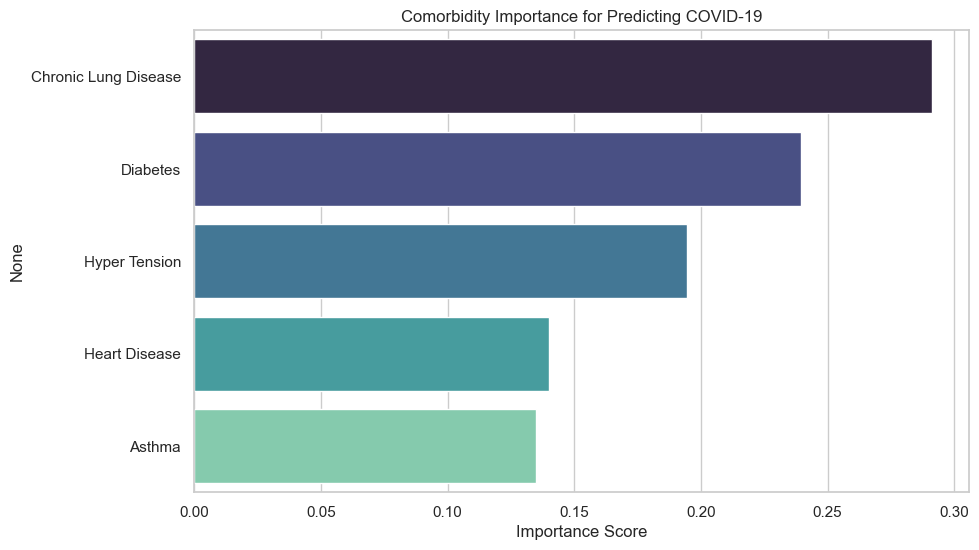

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# --- Method 2: Decision Trees and Feature Importance ---

# Define features (X) and target (y)
X = clean_df[comorbidities]
y = clean_df['COVID-19']

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize and train a Random Forest Classifier
# Random Forest is a collection of decision trees and is more robust
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Check model accuracy
accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"\n--- Random Forest Model Accuracy: {accuracy:.2%} ---")

# Get feature importances
importances = pd.Series(model.feature_importances_, index=comorbidities).sort_values(ascending=False)

print("\n--- Feature Importances from Random Forest ---")
print(importances)

# Visualize the importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index, palette='mako', hue = importances.index)
plt.title('Comorbidity Importance for Predicting COVID-19')
plt.xlabel('Importance Score')
plt.show()


## **7.0 Feature Engineering**

   - Create composite symptom score (sum of key symptoms)
   - Create composite comorbidity features
   - Exposure factors composition features

### 7.1 Featured Data Distribution Analysis

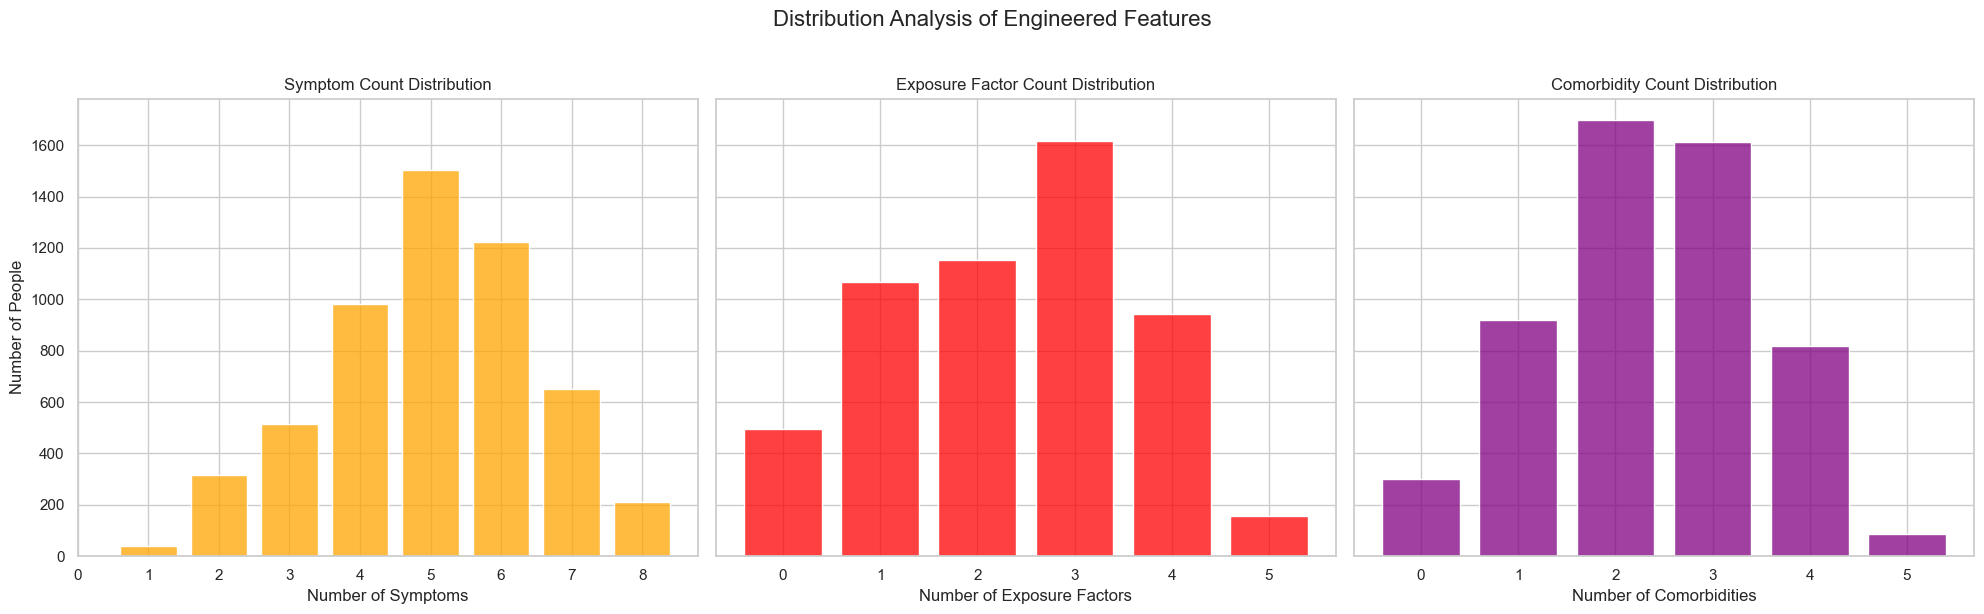

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Engineer the count features
# These columns will store the total number of symptoms, exposures, etc., for each person.
clean_df['Symptom_Count'] = clean_df[symptoms].sum(axis=1)
clean_df['Exposure_Count'] = clean_df[exposure_factors].sum(axis=1)
clean_df['Comorbidity_Count'] = clean_df[comorbidities].sum(axis=1)

# 2. Create a grid of plots for comparison
# We create a figure with 1 row and 3 columns of subplots.
# `sharey=True` ensures all plots use the same y-axis scale for direct comparison.
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
fig.suptitle('Distribution Analysis of Engineered Features', fontsize=16, y=1.02)

# Plot 1: Symptom Count
sns.histplot(data=clean_df, x='Symptom_Count', ax=axes[0], discrete=True, shrink=0.8, color = 'orange')
axes[0].set_title('Symptom Count Distribution')
axes[0].set_xlabel('Number of Symptoms')
axes[0].set_ylabel('Number of People')
# Set integer ticks for clarity, from 0 to the max possible count
axes[0].set_xticks(range(len(symptoms) + 1))

# Plot 2: Exposure Factor Count
sns.histplot(data=clean_df, x='Exposure_Factor_Count', ax=axes[1], discrete=True, shrink=0.8, color = 'red')
axes[1].set_title('Exposure Factor Count Distribution')
axes[1].set_xlabel('Number of Exposure Factors')
# Set integer ticks for clarity
axes[1].set_xticks(range(len(exposure_factors) + 1))

# Plot 3: Comorbidity Count
sns.histplot(data=clean_df, x='Comorbidity_Count', ax=axes[2], discrete=True, shrink=0.8, color = 'purple')
axes[2].set_title('Comorbidity Count Distribution')
axes[2].set_xlabel('Number of Comorbidities')
# Set integer ticks for clarity
axes[2].set_xticks(range(len(comorbidities) + 1))

# 3. Display the plots
plt.tight_layout()
plt.show()

### 7.2 Symptom Impact
**Features**
- Symptom Counts (`1` to `8`)
- Symptom Risk (`1` or `0`); at least `ONE` symptoms are 1
- Symptom High Risk (`1` or `0`) at least `THREE` important feature are 1


#### `Symptom_Counts`

Text(4, 0.5, 'Infection Probability: 89%')

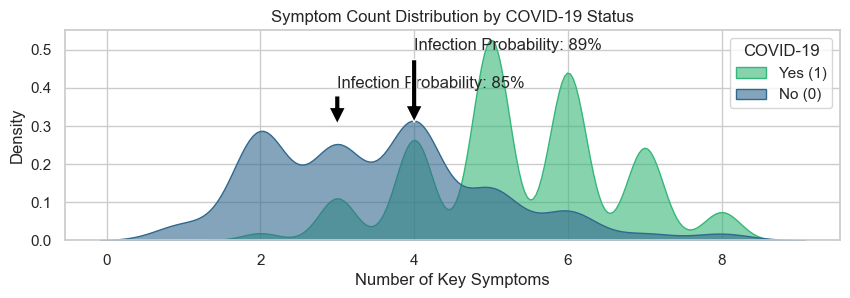

In [82]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
sns.kdeplot(data=clean_df, x='Symptom_Count', hue='COVID-19', 
            fill=True, common_norm=False, palette='viridis', alpha=0.6)
plt.title('Symptom Count Distribution by COVID-19 Status')
plt.xlabel('Number of Key Symptoms')
plt.legend(title='COVID-19', labels= ['Yes (1)', 'No (0)'] )

# Calculate infection probability for ≥3 symptoms
infection_prob1 = clean_df.loc[clean_df['Symptom_Count'] >= 3, 'COVID-19'].mean()
infection_prob2 = clean_df.loc[clean_df['Symptom_Count'] >= 4, 'COVID-19'].mean()

# Add annotation
plt.annotate(f"Infection Probability: {infection_prob1:.0%}",
             xy=(3, 0.3), xytext=(3, 0.4),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Add annotation
plt.annotate(f"Infection Probability: {infection_prob2:.0%}",
             xy=(4, 0.3), xytext=(4, 0.5),
             arrowprops=dict(facecolor='black', shrink=0.05))

#### `Symptom_Risk`

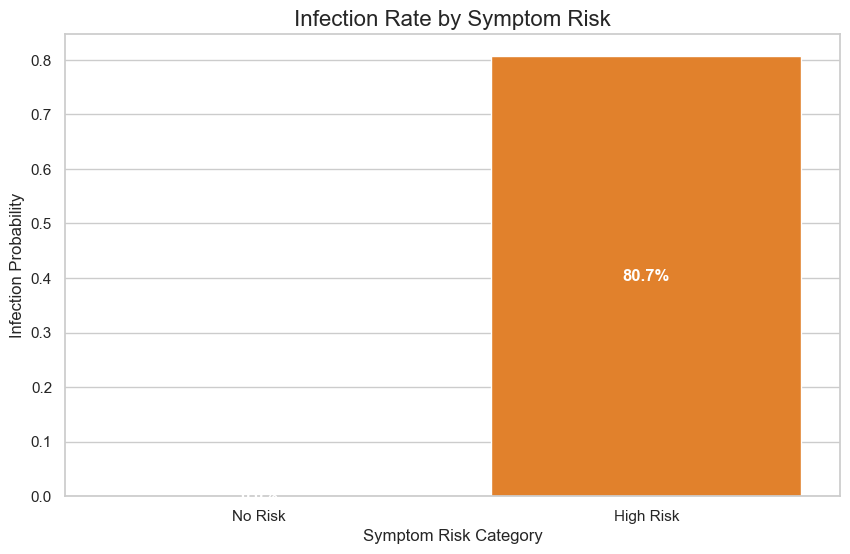

In [103]:
# Calculate infection rates
clean_df['Symptom_Risk'] = (clean_df['Fever'] == 1 ) | \
                                 (clean_df['Dry Cough'] == 1) | \
                                 (clean_df['Breathing Problem'] == 1) | \
                                 (clean_df['Sore throat'] == 1) | \
                                 (clean_df['Running Nose'] == 1) | \
                                 (clean_df['Headache'] == 1) | \
                                 (clean_df['Fatigue '] == 1) | \
                                 (clean_df['Gastrointestinal '] == 1)
# Group by and calculate mean. This returns a pandas Series.
symptom_rates = clean_df.groupby('Symptom_Risk')['COVID-19'].mean()

# Reindex to ensure both categories (False/True) exist, filling missing ones with 0.
# This prevents errors if the data only contains 'No Risk' or 'High Risk' subjects.
symptom_rates = symptom_rates.reindex([False, True], fill_value=0)

# Create the final DataFrame for plotting, now guaranteed to have both categories.
symptom_risk = symptom_rates.reset_index()
# Use a more explicit map with boolean keys (False/True)
symptom_risk['Symptom_Risk'] = symptom_risk['Symptom_Risk'].map({False: 'No Risk', True: 'High Risk'})

fig, ax = plt.subplots(figsize=(10, 6))

# Define a more intuitive and robust palette using a dictionary
palette_colors = {'No Risk': '#1f77b4', 'High Risk': '#ff7f0e'}

# Create bar plot using the axes object 'ax'
sns.barplot(ax=ax, x='Symptom_Risk', y='COVID-19', data=symptom_risk,
            palette=palette_colors, order=['No Risk', 'High Risk'],
            hue='Symptom_Risk', legend=False)

# Set titles and labels on the axes object
ax.set_title('Infection Rate by Symptom Risk', fontsize=16)
ax.set_ylabel('Infection Probability')
ax.set_xlabel('Symptom Risk Category')

# --- The Robust Way to Add Labels ---
# Iterate through the bars (patches) in the plot
for bar in ax.patches:
    # Get the bar's height (the value) and position
    height = bar.get_height()
    x_position = bar.get_x() + bar.get_width() / 2.0
    y_position = height / 2.0 # Place text in the middle of the bar

    # Format the label and add it to the plot
    ax.text(x=x_position, y=y_position,
            s=f'{height:.1%}',      # Use f-string for percentage formatting
            ha='center',            # Horizontal alignment
            va='center',            # Vertical alignment
            color='white',
            fontweight='bold',
            size=12)

plt.show()

#### `Symptom_High_Risk`

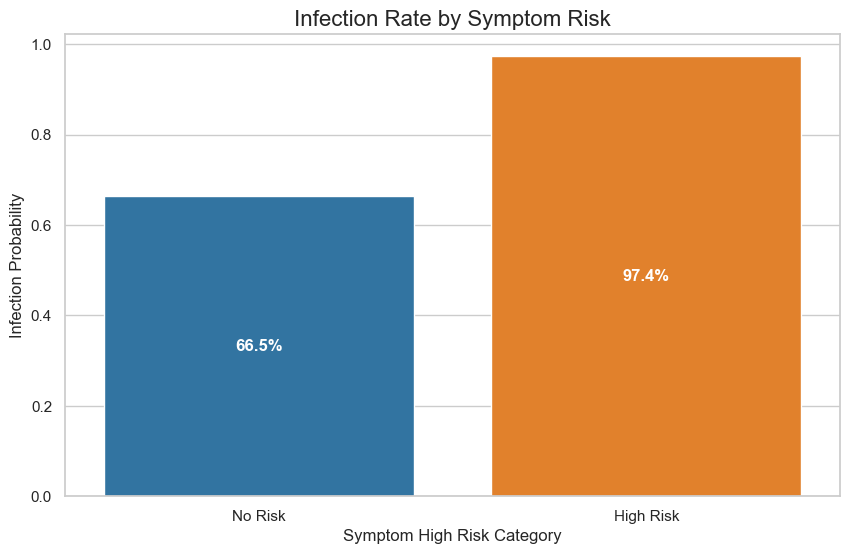

In [84]:
clean_df['Symptom_High_Risk'] =  (clean_df['Dry Cough'] == 1) & \
                                 (clean_df['Breathing Problem'] == 1) & \
                                 (clean_df['Sore throat'] == 1)
# Group by and calculate mean. This returns a pandas Series.
symptom_high_rates = clean_df.groupby('Symptom_High_Risk')['COVID-19'].mean()

# Reindex to ensure both categories (False/True) exist, filling missing ones with 0.
# This prevents errors if the data only contains 'No Risk' or 'High Risk' subjects.
symptom_high_rates = symptom_high_rates.reindex([False, True], fill_value=0)

# Create the final DataFrame for plotting, now guaranteed to have both categories.
symptom_high_risk = symptom_high_rates.reset_index()
# Use a more explicit map with boolean keys (False/True)
symptom_high_risk['Symptom_High_Risk'] = symptom_high_risk['Symptom_High_Risk'].map({False: 'No Risk', True: 'High Risk'})

fig, ax = plt.subplots(figsize=(10, 6))

# Define a more intuitive and robust palette using a dictionary
palette_colors = {'No Risk': '#1f77b4', 'High Risk': '#ff7f0e'}

# Create bar plot using the axes object 'ax'
sns.barplot(ax=ax, x='Symptom_High_Risk', y='COVID-19', data=symptom_high_risk,
            palette=palette_colors, order=['No Risk', 'High Risk'],
            hue='Symptom_High_Risk', legend=False)

# Set titles and labels on the axes object
ax.set_title('Infection Rate by Symptom Risk', fontsize=16)
ax.set_ylabel('Infection Probability')
ax.set_xlabel('Symptom High Risk Category')

# --- The Robust Way to Add Labels ---
# Iterate through the bars (patches) in the plot
for bar in ax.patches:
    # Get the bar's height (the value) and position
    height = bar.get_height()
    x_position = bar.get_x() + bar.get_width() / 2.0
    y_position = height / 2.0 # Place text in the middle of the bar

    # Format the label and add it to the plot
    ax.text(x=x_position, y=y_position,
            s=f'{height:.1%}',      # Use f-string for percentage formatting
            ha='center',            # Horizontal alignment
            va='center',            # Vertical alignment
            color='white',
            fontweight='bold',
            size=12)

plt.show()

#### Symptom Impact Features Effectiveness

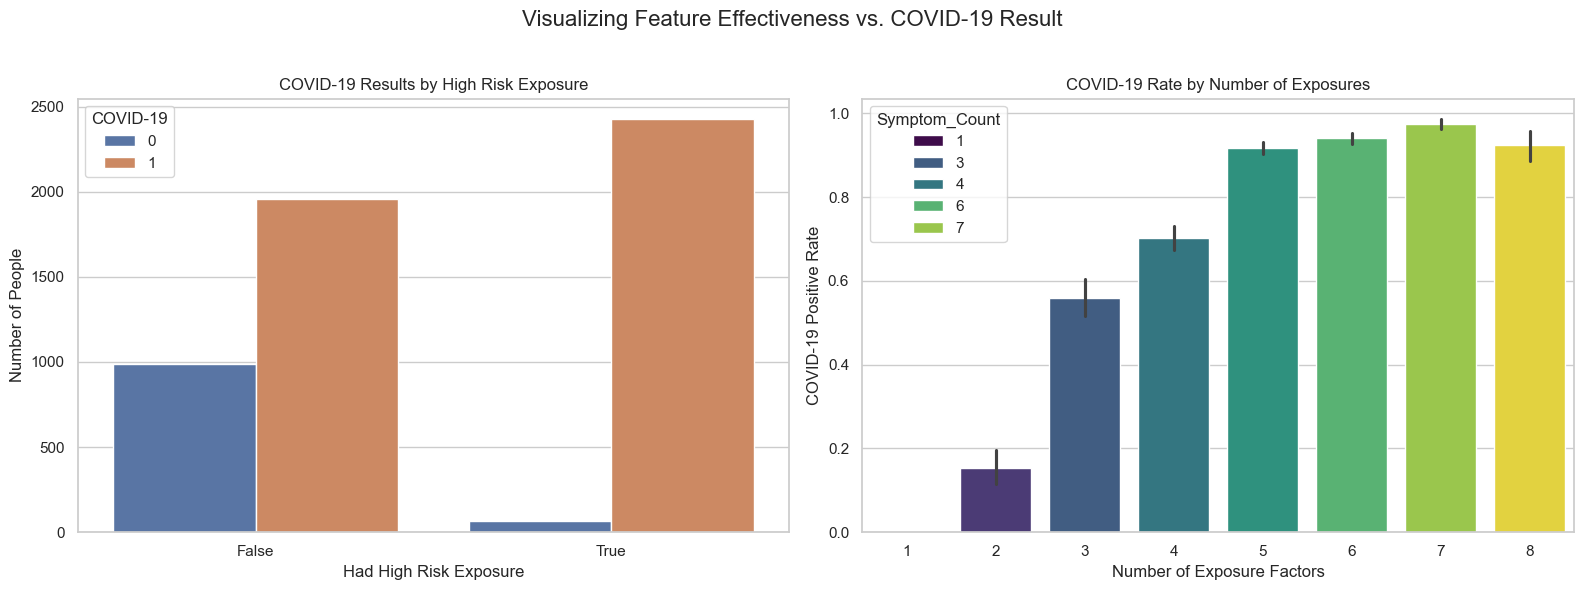

Correlation between 'Symptom_Count' and Target: 0.4844
Correlation between 'Symptom_High_Risk' and Target: 0.3899


In [105]:
# 2. Visualize the effectiveness of the features
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Visualizing Feature Effectiveness vs. COVID-19 Result', fontsize=16)

sns.countplot(ax=axes[0], data=clean_df, x='Symptom_High_Risk', hue='COVID-19')
axes[0].set_title('COVID-19 Results by High Risk Exposure')
axes[0].set_xlabel('Had High Risk Exposure')
axes[0].set_ylabel('Number of People')

# Plot for Exposure_Factor_Count (Numerical Feature)
# This plot shows the mean of COVID-19_Result (i.e., the infection rate) for each count.
sns.barplot(ax=axes[1], data=clean_df, x='Symptom_Count', y='COVID-19', palette='viridis',  hue='Symptom_Count')
axes[1].set_title('COVID-19 Rate by Number of Exposures')
axes[1].set_xlabel('Number of Exposure Factors')
axes[1].set_ylabel('COVID-19 Positive Rate')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Calculate the correlation of each engineered feature with the target
correlation_count = clean_df['Symptom_Count'].corr(clean_df['COVID-19'])
correlation_high_risk = clean_df['Symptom_High_Risk'].corr(clean_df['COVID-19'])

print(f"Correlation between 'Symptom_Count' and Target: {correlation_count:.4f}")
print(f"Correlation between 'Symptom_High_Risk' and Target: {correlation_high_risk:.4f}")

### 7.2 Exposure Impact
**Feature**
- Exposure Count (1 to 5)
- Exposure Risk (1 or 0) at least ONE exposure to be 1
- Exposure High Risk (1 or 0) at least THREE exposure to be 1

#### `Exposure_High_Risk`

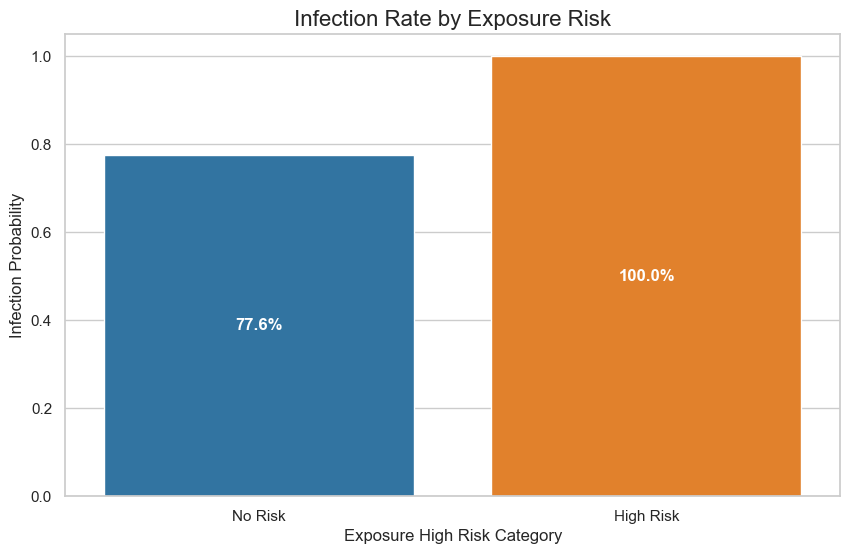

In [106]:
clean_df['Exposure_High_Risk'] =  (clean_df['Abroad travel'] == 1) & \
                                 (clean_df['Contact with COVID Patient'] == 1) & \
                                 (clean_df['Attended Large Gathering'] == 1)
# Group by and calculate mean. This returns a pandas Series.
exposure_high_rates = clean_df.groupby('Exposure_High_Risk')['COVID-19'].mean()

# Reindex to ensure both categories (False/True) exist, filling missing ones with 0.
# This prevents errors if the data only contains 'No Risk' or 'High Risk' subjects.
exposure_high_rates = exposure_high_rates.reindex([False, True], fill_value=0)

# Create the final DataFrame for plotting, now guaranteed to have both categories.
exposure_high_risk = exposure_high_rates.reset_index()
# Use a more explicit map with boolean keys (False/True)
exposure_high_risk['Exposure_High_Risk'] = exposure_high_risk['Exposure_High_Risk'].map({False: 'No Risk', True: 'High Risk'})

fig, ax = plt.subplots(figsize=(10, 6))

# Define a more intuitive and robust palette using a dictionary
palette_colors = {'No Risk': '#1f77b4', 'High Risk': '#ff7f0e'}

# Create bar plot using the axes object 'ax'
sns.barplot(ax=ax, x='Exposure_High_Risk', y='COVID-19', data=exposure_high_risk,
            palette=palette_colors, order=['No Risk', 'High Risk'],
            hue='Exposure_High_Risk', legend=False)

# Set titles and labels on the axes object
ax.set_title('Infection Rate by Exposure Risk', fontsize=16)
ax.set_ylabel('Infection Probability')
ax.set_xlabel('Exposure High Risk Category')

# --- The Robust Way to Add Labels ---
# Iterate through the bars (patches) in the plot
for bar in ax.patches:
    # Get the bar's height (the value) and position
    height = bar.get_height()
    x_position = bar.get_x() + bar.get_width() / 2.0
    y_position = height / 2.0 # Place text in the middle of the bar

    # Format the label and add it to the plot
    ax.text(x=x_position, y=y_position,
            s=f'{height:.1%}',      # Use f-string for percentage formatting
            ha='center',            # Horizontal alignment
            va='center',            # Vertical alignment
            color='white',
            fontweight='bold',
            size=12)

plt.show()

#### `Exposure_Risk`
- **Construction**: Binary OR of `Abroad travel` OR `Contact with COVID Patient` OR `Attended Large Gathering` OR `Visited Public Exposed Places` OR `Family working in Public Exposed Places`
- **Risk Impact**:
  - High-risk individuals: `86.7%` infection rate
  - Low-risk individuals: `20.3%` infection rate
  - 4.0x higher risk than no exposure

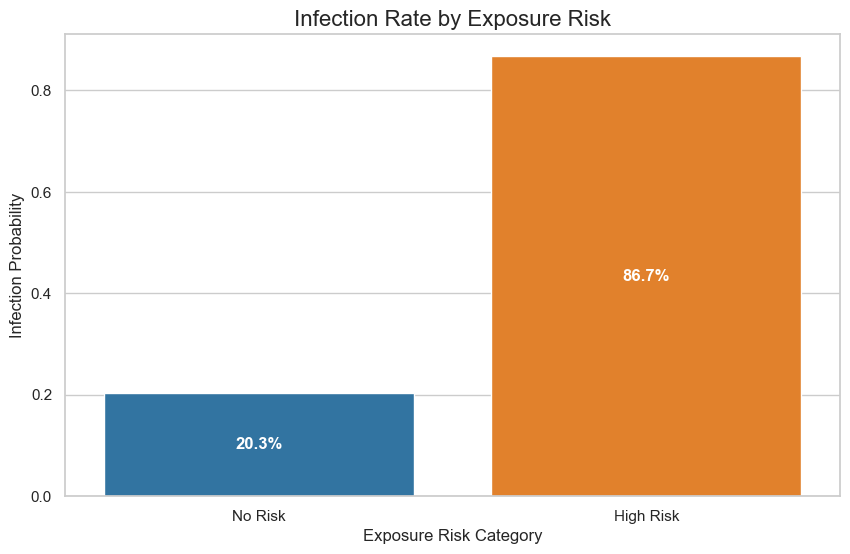

In [107]:
# Calculate infection rates
clean_df['Exposure_Risk'] = (clean_df['Contact with COVID Patient'] == 1 ) | \
                                 (clean_df['Abroad travel'] == 1) | \
                                 (clean_df['Attended Large Gathering'] == 1) | \
                                 (clean_df['Visited Public Exposed Places'] == 1) | \
                                 (clean_df['Family working in Public Exposed Places'] == 1)
# Group by and calculate mean. This returns a pandas Series.
exposure_rates = clean_df.groupby('Exposure_Risk')['COVID-19'].mean()

# Reindex to ensure both categories (False/True) exist, filling missing ones with 0.
# This prevents errors if the data only contains 'No Risk' or 'High Risk' subjects.
exposure_rates = exposure_rates.reindex([False, True], fill_value=0)

# Create the final DataFrame for plotting, now guaranteed to have both categories.
exposure_risk = exposure_rates.reset_index()
# Use a more explicit map with boolean keys (False/True)
exposure_risk['Exposure_Risk'] = exposure_risk['Exposure_Risk'].map({False: 'No Risk', True: 'High Risk'})

fig, ax = plt.subplots(figsize=(10, 6))

# Define a more intuitive and robust palette using a dictionary
palette_colors = {'No Risk': '#1f77b4', 'High Risk': '#ff7f0e'}

# Create bar plot using the axes object 'ax'
sns.barplot(ax=ax, x='Exposure_Risk', y='COVID-19', data=exposure_risk,
            palette=palette_colors, order=['No Risk', 'High Risk'],
            hue='Exposure_Risk', legend=False)

# Set titles and labels on the axes object
ax.set_title('Infection Rate by Exposure Risk', fontsize=16)
ax.set_ylabel('Infection Probability')
ax.set_xlabel('Exposure Risk Category')

# --- The Robust Way to Add Labels ---
# Iterate through the bars (patches) in the plot
for bar in ax.patches:
    # Get the bar's height (the value) and position
    height = bar.get_height()
    x_position = bar.get_x() + bar.get_width() / 2.0
    y_position = height / 2.0 # Place text in the middle of the bar

    # Format the label and add it to the plot
    ax.text(x=x_position, y=y_position,
            s=f'{height:.1%}',      # Use f-string for percentage formatting
            ha='center',            # Horizontal alignment
            va='center',            # Vertical alignment
            color='white',
            fontweight='bold',
            size=12)

plt.show()

#### `Exposure_Count`

Text(4, 0.4, 'Infection Probability: 99%')

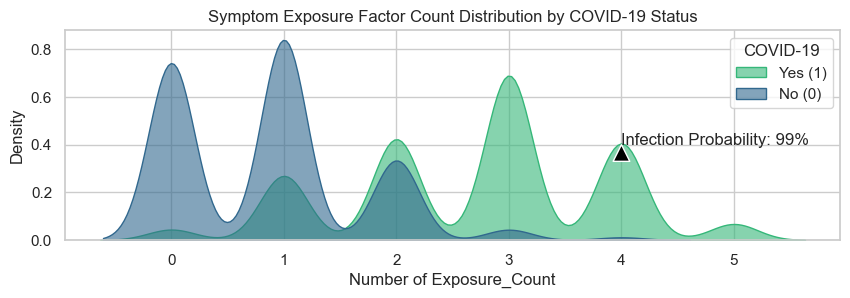

In [111]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
sns.kdeplot(data=clean_df, x='Exposure_Count', hue='COVID-19', 
            fill=True, common_norm=False, palette='viridis', alpha=0.6)
plt.title('Symptom Exposure Factor Count Distribution by COVID-19 Status')
plt.xlabel('Number of Exposure_Count')
plt.legend(title='COVID-19', labels= ['Yes (1)', 'No (0)'] )

# Calculate infection probability for ≥3 symptoms
infection_prob = clean_df.loc[clean_df['Exposure_Count'] >= 3, 'COVID-19'].mean()

# Add annotation
plt.annotate(f"Infection Probability: {infection_prob:.0%}",
             xy=(4, 0.4), xytext=(4, 0.4),
             arrowprops=dict(facecolor='black', shrink=0.05))

#### Exposure Impact Feature Effectiveness

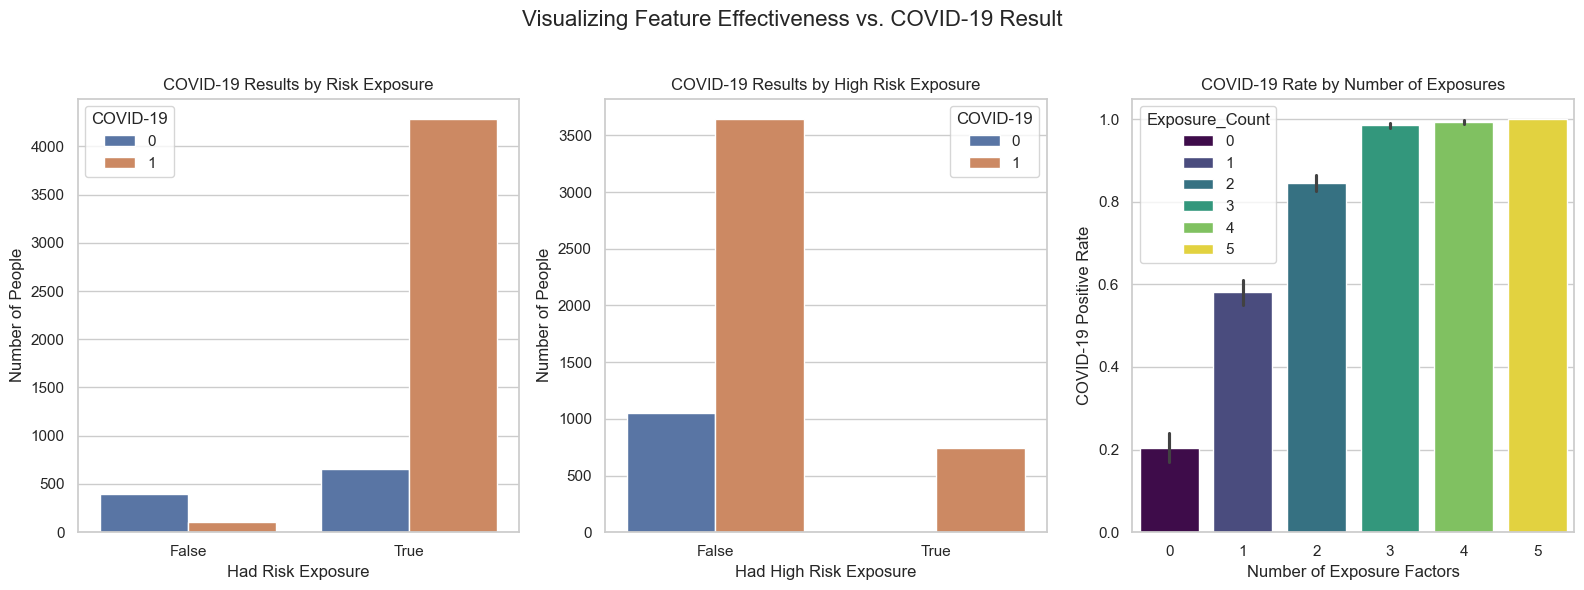

Correlation between 'Exposure_Risk' and Target: 0.4847
Correlation between 'Exposure_High_Risk' and Target: 0.1943
Correlation between 'Exposure_Count' and Target: 0.5641


In [113]:
# 2. Visualize the effectiveness of the features
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
fig.suptitle('Visualizing Feature Effectiveness vs. COVID-19 Result', fontsize=16)

# Plot for High_Risk_Exposure (Binary Feature)
sns.countplot(ax=axes[0], data=clean_df, x='Exposure_Risk', hue='COVID-19')
axes[0].set_title('COVID-19 Results by Risk Exposure')
axes[0].set_xlabel('Had Risk Exposure')
axes[0].set_ylabel('Number of People')

sns.countplot(ax=axes[1], data=clean_df, x='Exposure_High_Risk', hue='COVID-19')
axes[1].set_title('COVID-19 Results by High Risk Exposure')
axes[1].set_xlabel('Had High Risk Exposure')
axes[1].set_ylabel('Number of People')

# Plot for Exposure_Factor_Count (Numerical Feature)
# This plot shows the mean of COVID-19_Result (i.e., the infection rate) for each count.
sns.barplot(ax=axes[2], data=clean_df, x='Exposure_Count', y='COVID-19', palette='viridis',  hue='Exposure_Count')
axes[2].set_title('COVID-19 Rate by Number of Exposures')
axes[2].set_xlabel('Number of Exposure Factors')
axes[2].set_ylabel('COVID-19 Positive Rate')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Calculate the correlation of each engineered feature with the target
correlation_risk = clean_df['Exposure_Risk'].corr(clean_df['COVID-19'])
correlation_high_risk = clean_df['Exposure_High_Risk'].corr(clean_df['COVID-19'])
correlation_count = clean_df['Exposure_Count'].corr(clean_df['COVID-19'])

print(f"Correlation between 'Exposure_Risk' and Target: {correlation_risk:.4f}")
print(f"Correlation between 'Exposure_High_Risk' and Target: {correlation_high_risk:.4f}")
print(f"Correlation between 'Exposure_Count' and Target: {correlation_count:.4f}")


In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Define features (X) and target (y)
features_to_test = ['High_Risk_Exposure', 'Exposure_Factor_Count']
X = clean_df[features_to_test]
y = clean_df['COVID-19']

# --- Using Logistic Regression ---
# Logistic regression coefficients can be interpreted as feature importance
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)

# Create a series to view the coefficients clearly
log_reg_coeffs = pd.Series(log_reg.coef_[0], index=features_to_test).sort_values(ascending=False)
print("--- Logistic Regression Coefficients ---")
print(log_reg_coeffs)
print("\n")


# --- Using Random Forest ---
# Tree-based models have a built-in feature_importances_ attribute
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X, y)

# Create a series to view the importances clearly
rf_importances = pd.Series(rf_clf.feature_importances_, index=features_to_test).sort_values(ascending=False)
print("--- Random Forest Feature Importances ---")
print(rf_importances)


--- Logistic Regression Coefficients ---
Exposure_Factor_Count    1.675566
High_Risk_Exposure      -0.040125
dtype: float64


--- Random Forest Feature Importances ---
Exposure_Factor_Count    0.656128
High_Risk_Exposure       0.343872
dtype: float64


### 7.3 Comorbidities Impact
**Feature**
- Comorbidity Count (1 to 5)
- Comorbidity Risk (1 or 0) at least ONE exposure to be 1
- Comorbidity High Risk (1 or 0) at least THREE exposure to be 1

#### `Comorbidity_Count`

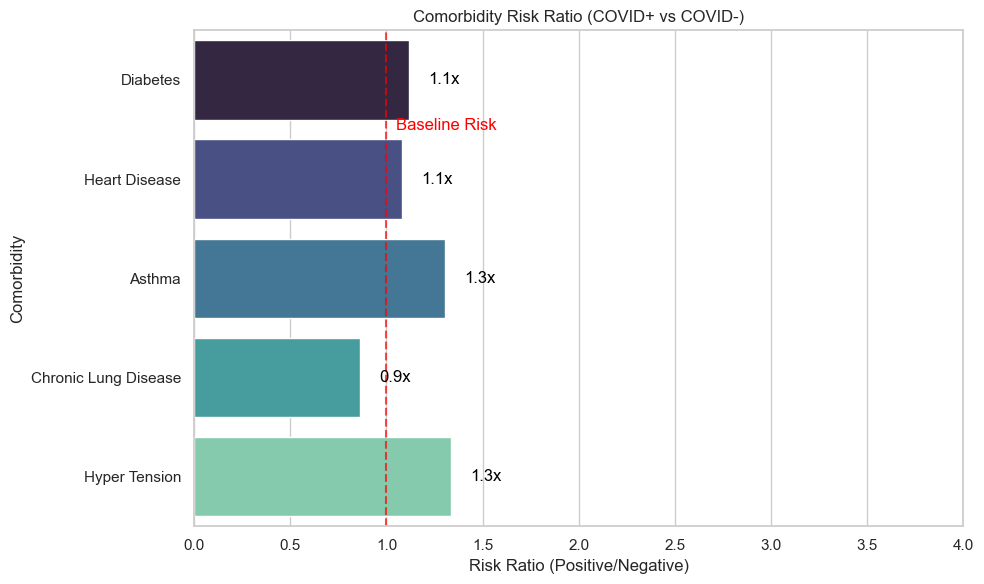

In [90]:
plt.figure(figsize=(10, 6))

# Prepare comorbidity data
comorbidities = ['Diabetes', 'Heart Disease', 'Asthma', 'Chronic Lung Disease', 'Hyper Tension']
comorbidity_risk = clean_df.groupby('COVID-19')[comorbidities].mean().T

# Calculate risk ratio
comorbidity_risk['Risk_Ratio'] = comorbidity_risk[1] / comorbidity_risk[0]

# Create bar plot
sns.barplot(x='Risk_Ratio', y=comorbidity_risk.index, data=comorbidity_risk, palette='mako', hue = comorbidity_risk.index )
plt.title('Comorbidity Risk Ratio (COVID+ vs COVID-)')
plt.xlabel('Risk Ratio (Positive/Negative)')
plt.ylabel('Comorbidity')
plt.xlim(0, 4)

# Add annotations
for i, v in enumerate(comorbidity_risk['Risk_Ratio']):
    plt.text(v + 0.1, i, f"{v:.1f}x", color='black', va='center')
    
plt.axvline(1, color='red', linestyle='--', alpha=0.7)
plt.text(1.05, 0.5, 'Baseline Risk', color='red')

plt.tight_layout()
plt.show()

Text(4, 0.4, 'Infection Probability: 85%')

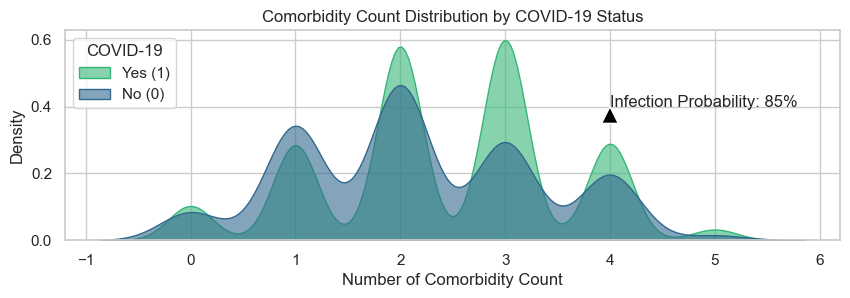

In [131]:
clean_df['Comorbidity_Count'] = clean_df[comorbidities].sum(axis=1)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
sns.kdeplot(data=clean_df, x='Comorbidity_Count', hue='COVID-19', 
            fill=True, common_norm=False, palette='viridis', alpha=0.6)
plt.title('Comorbidity Count Distribution by COVID-19 Status')
plt.xlabel('Number of Comorbidity Count')
plt.legend(title='COVID-19', labels= ['Yes (1)', 'No (0)'] )

# Calculate infection probability for ≥3 symptoms
infection_prob = clean_df.loc[clean_df['Comorbidity_Count'] >= 3, 'COVID-19'].mean()

# Add annotation
plt.annotate(f"Infection Probability: {infection_prob:.0%}",
             xy=(4, 0.4), xytext=(4, 0.4),
             arrowprops=dict(facecolor='black', shrink=0.05))

#### `Comorbidity_Risk`

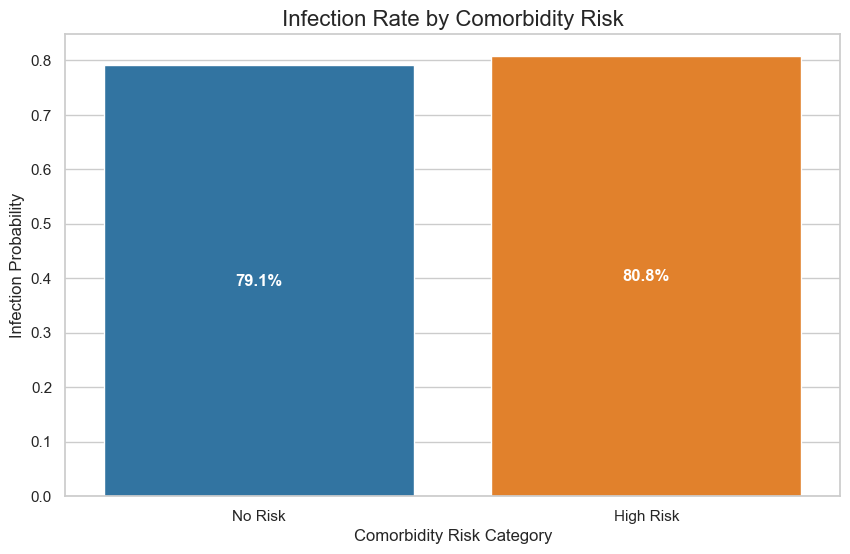

In [116]:
# Calculate infection rates
clean_df['Comorbidity_Risk'] = (clean_df['Asthma'] == 1 ) | \
                                 (clean_df['Chronic Lung Disease'] == 1) | \
                                 (clean_df['Heart Disease'] == 1) | \
                                 (clean_df['Diabetes'] == 1) | \
                                 (clean_df['Hyper Tension'] == 1)
# Group by and calculate mean. This returns a pandas Series.
comorbidity_rates = clean_df.groupby('Comorbidity_Risk')['COVID-19'].mean()

# Reindex to ensure both categories (False/True) exist, filling missing ones with 0.
# This prevents errors if the data only contains 'No Risk' or 'High Risk' subjects.
comorbidity_rates = comorbidity_rates.reindex([False, True], fill_value=0)

# Create the final DataFrame for plotting, now guaranteed to have both categories.
comorbidity_risk = comorbidity_rates.reset_index()
# Use a more explicit map with boolean keys (False/True)
comorbidity_risk['Comorbidity_Risk'] = comorbidity_risk['Comorbidity_Risk'].map({False: 'No Risk', True: 'High Risk'})

fig, ax = plt.subplots(figsize=(10, 6))

# Define a more intuitive and robust palette using a dictionary
palette_colors = {'No Risk': '#1f77b4', 'High Risk': '#ff7f0e'}

# Create bar plot using the axes object 'ax'
sns.barplot(ax=ax, x='Comorbidity_Risk', y='COVID-19', data=comorbidity_risk,
            palette=palette_colors, order=['No Risk', 'High Risk'],
            hue='Comorbidity_Risk', legend=False)

# Set titles and labels on the axes object
ax.set_title('Infection Rate by Comorbidity Risk', fontsize=16)
ax.set_ylabel('Infection Probability')
ax.set_xlabel('Comorbidity Risk Category')

# --- The Robust Way to Add Labels ---
# Iterate through the bars (patches) in the plot
for bar in ax.patches:
    # Get the bar's height (the value) and position
    height = bar.get_height()
    x_position = bar.get_x() + bar.get_width() / 2.0
    y_position = height / 2.0 # Place text in the middle of the bar

    # Format the label and add it to the plot
    ax.text(x=x_position, y=y_position,
            s=f'{height:.1%}',      # Use f-string for percentage formatting
            ha='center',            # Horizontal alignment
            va='center',            # Vertical alignment
            color='white',
            fontweight='bold',
            size=12)

plt.show()

#### `Comorbidity_High_Risk`

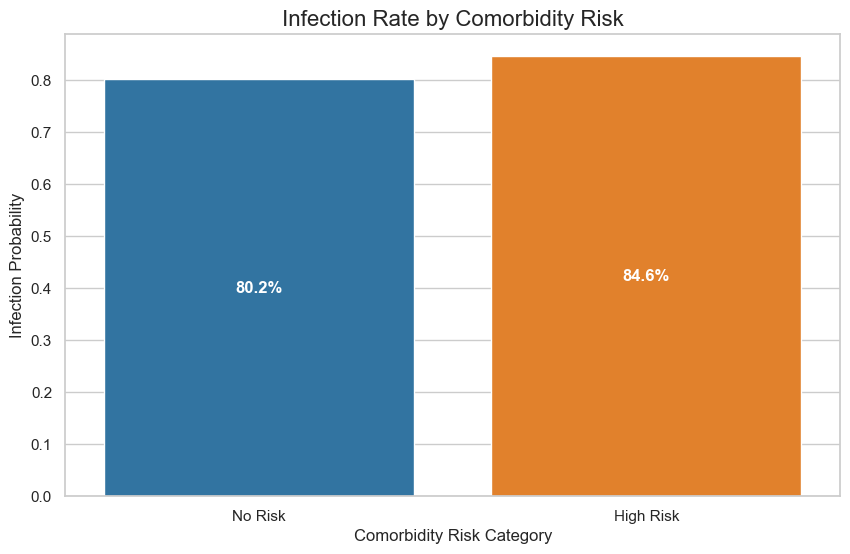

In [119]:
# Calculate infection rates
clean_df['Comorbidity_High_Risk'] = (clean_df['Chronic Lung Disease'] == 1) & \
                                    (clean_df['Diabetes'] == 1) & \
                                    (clean_df['Hyper Tension'] == 1)
# Group by and calculate mean. This returns a pandas Series.
comorbidity_high_rates = clean_df.groupby('Comorbidity_High_Risk')['COVID-19'].mean()

# Reindex to ensure both categories (False/True) exist, filling missing ones with 0.
# This prevents errors if the data only contains 'No Risk' or 'High Risk' subjects.
comorbidity_high_rates = comorbidity_high_rates.reindex([False, True], fill_value=0)

# Create the final DataFrame for plotting, now guaranteed to have both categories.
comorbidity_high_risk = comorbidity_high_rates.reset_index()
# Use a more explicit map with boolean keys (False/True)
comorbidity_high_risk['Comorbidity_High_Risk'] = comorbidity_high_risk['Comorbidity_High_Risk'].map({False: 'No Risk', True: 'High Risk'})

fig, ax = plt.subplots(figsize=(10, 6))

# Define a more intuitive and robust palette using a dictionary
palette_colors = {'No Risk': '#1f77b4', 'High Risk': '#ff7f0e'}

# Create bar plot using the axes object 'ax'
sns.barplot(ax=ax, x='Comorbidity_High_Risk', y='COVID-19', data=comorbidity_high_risk,
            palette=palette_colors, order=['No Risk', 'High Risk'],
            hue='Comorbidity_High_Risk', legend=False)

# Set titles and labels on the axes object
ax.set_title('Infection Rate by Comorbidity Risk', fontsize=16)
ax.set_ylabel('Infection Probability')
ax.set_xlabel('Comorbidity Risk Category')

# --- The Robust Way to Add Labels ---
# Iterate through the bars (patches) in the plot
for bar in ax.patches:
    # Get the bar's height (the value) and position
    height = bar.get_height()
    x_position = bar.get_x() + bar.get_width() / 2.0
    y_position = height / 2.0 # Place text in the middle of the bar

    # Format the label and add it to the plot
    ax.text(x=x_position, y=y_position,
            s=f'{height:.1%}',      # Use f-string for percentage formatting
            ha='center',            # Horizontal alignment
            va='center',            # Vertical alignment
            color='white',
            fontweight='bold',
            size=12)

plt.show()

#### Comorbidity Impact Feature Effectiveness

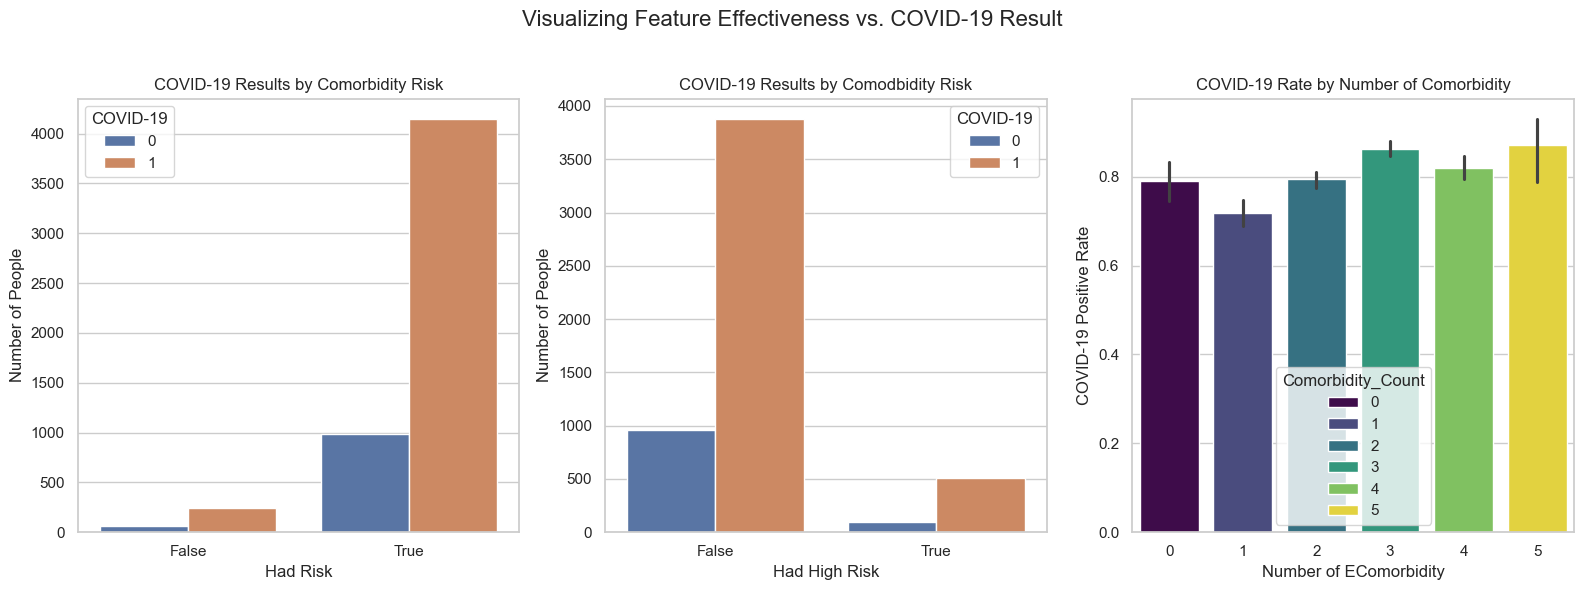

Correlation between 'Comodbidity_Risk' and Target: 0.0097
Correlation between 'Comorbidity_High_Risk' and Target: 0.0355
Correlation between 'Comorbidity_Count' and Target: 0.0891


In [120]:
# 2. Visualize the effectiveness of the features
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
fig.suptitle('Visualizing Feature Effectiveness vs. COVID-19 Result', fontsize=16)

sns.countplot(ax=axes[0], data=clean_df, x='Comorbidity_Risk', hue='COVID-19')
axes[0].set_title('COVID-19 Results by Comorbidity Risk')
axes[0].set_xlabel('Had Risk')
axes[0].set_ylabel('Number of People')

sns.countplot(ax=axes[1], data=clean_df, x='Comorbidity_High_Risk', hue='COVID-19')
axes[1].set_title('COVID-19 Results by Comodbidity Risk')
axes[1].set_xlabel('Had High Risk')
axes[1].set_ylabel('Number of People')

# Plot for Comorbidity_Count (Numerical Feature)
# This plot shows the mean of COVID-19_Result (i.e., the infection rate) for each count.
sns.barplot(ax=axes[2], data=clean_df, x='Comorbidity_Count', y='COVID-19', palette='viridis',  hue='Comorbidity_Count')
axes[2].set_title('COVID-19 Rate by Number of Comorbidity')
axes[2].set_xlabel('Number of EComorbidity')
axes[2].set_ylabel('COVID-19 Positive Rate')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Calculate the correlation of each engineered feature with the target
correlation_risk = clean_df['Comorbidity_Risk'].corr(clean_df['COVID-19'])
correlation_high_risk = clean_df['Comorbidity_High_Risk'].corr(clean_df['COVID-19'])
correlation_count = clean_df['Comorbidity_Count'].corr(clean_df['COVID-19'])

print(f"Correlation between 'Comodbidity_Risk' and Target: {correlation_risk:.4f}")
print(f"Correlation between 'Comorbidity_High_Risk' and Target: {correlation_high_risk:.4f}")
print(f"Correlation between 'Comorbidity_Count' and Target: {correlation_count:.4f}")


### 7.4 Feature Correlation Comparison

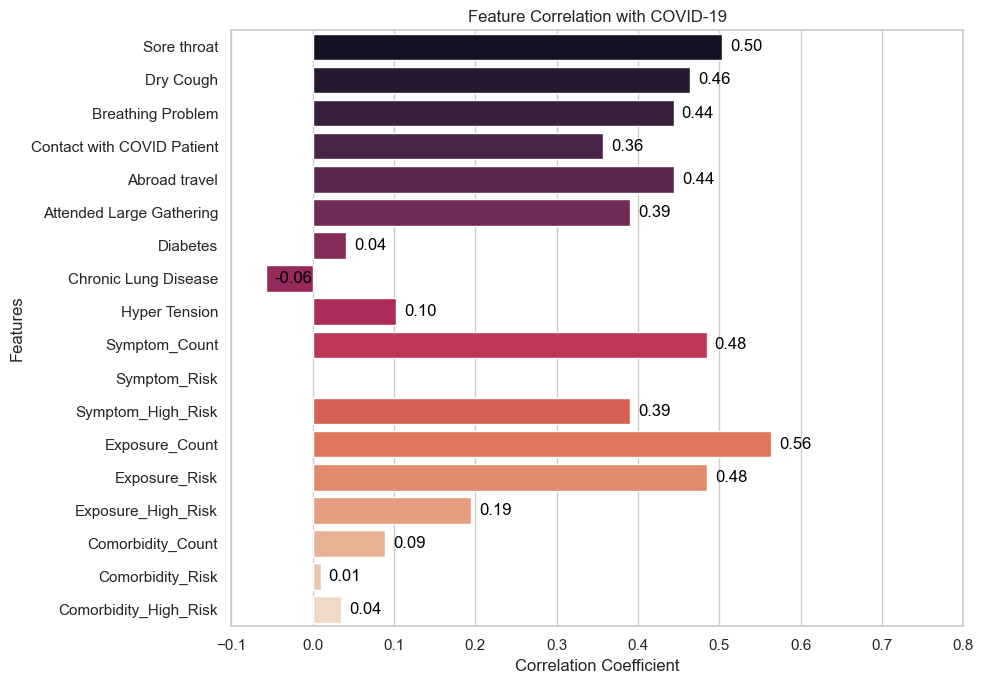

In [122]:
fig, ax = plt.subplots(figsize=(10, 7))

# Calculate correlations for original features
original_features = ['Sore throat', 'Dry Cough', 'Breathing Problem', 'Contact with COVID Patient', 'Abroad travel', 'Attended Large Gathering', 'Diabetes', 'Chronic Lung Disease', 'Hyper Tension']
original_corr = clean_df[original_features + ['COVID-19']].corr()['COVID-19'].drop('COVID-19')

# Calculate correlations for engineered features
engineered_features = ['Symptom_Count', 'Symptom_Risk', 'Symptom_High_Risk', 'Exposure_Count', 'Exposure_Risk', 'Exposure_High_Risk','Comorbidity_Count', 'Comorbidity_Risk', 'Comorbidity_High_Risk']
engineered_corr = clean_df[engineered_features + ['COVID-19']].corr()['COVID-19'].drop('COVID-19')

# Combine correlations
corr_comparison = pd.concat([original_corr, engineered_corr])

# Create bar plot
sns.barplot(y=corr_comparison.index, x=corr_comparison.values, palette='rocket', hue = corr_comparison.index)
plt.title('Feature Correlation with COVID-19')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.xlim(-0.1, 0.8)

# Add correlation values
for i, v in enumerate(corr_comparison):
    plt.text(v + 0.01, i, f"{v:.2f}", color='black', va='center')

plt.tight_layout()
plt.show()

### 7.4 Interaction: `Symptom_Count` + `Exposure_Count` + `Comorbidity_Count`

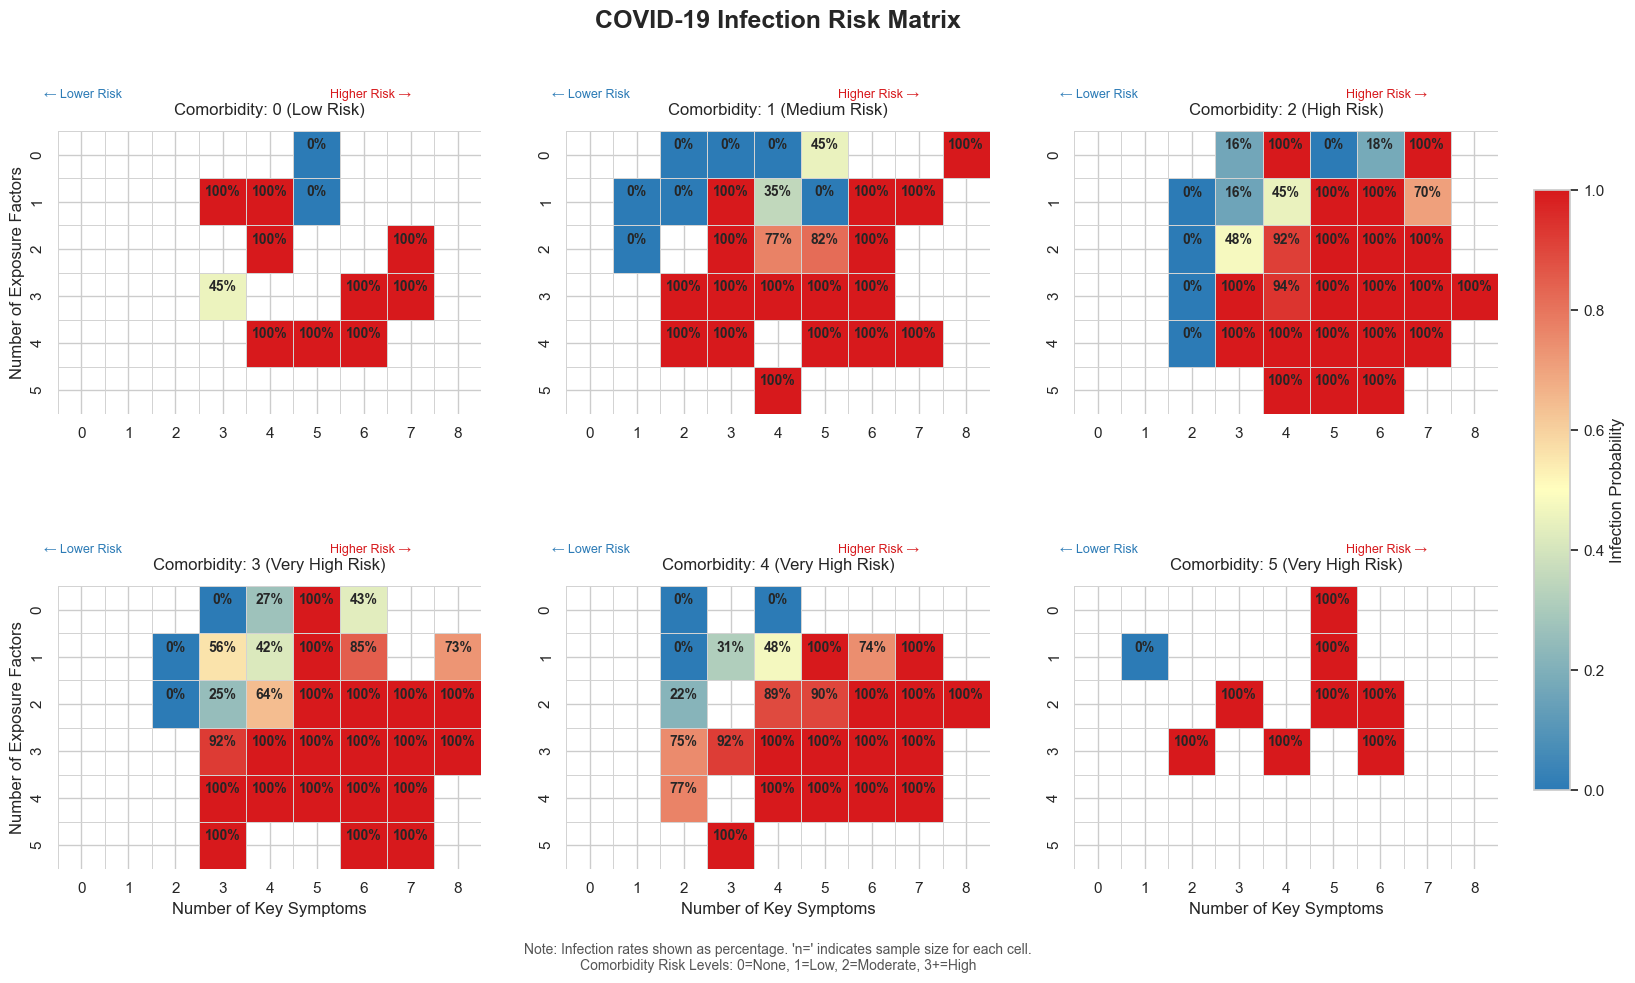

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Create a custom colormap
cmap = mcolors.LinearSegmentedColormap.from_list("infection_risk", ["#2c7bb6", "#ffffbf", "#d7191c"])

# Create pivot table
interaction_df = clean_df.groupby([
    'Comorbidity_Count',
    'Exposure_Count',
    'Symptom_Count'
])['COVID-19'].agg(['mean', 'count']).reset_index()
interaction_df.rename(columns={'mean': 'Infection_Rate'}, inplace=True)

# Define the fixed ranges for the axes
SYMPTOM_RANGE = range(9)  # 0 to 8
EXPOSURE_RANGE = range(6) # 0 to 5

# Create FacetGrid with enhanced settings
g = sns.FacetGrid(
    interaction_df,
    col="Comorbidity_Count",
    col_wrap=min(3, interaction_df['Comorbidity_Count'].nunique()),
    height=5,
    aspect=1.2,
    sharex=False,
    sharey=False,
)

# Define function to draw enhanced heatmap
def draw_enhanced_heatmap(data, **kwargs):
    # Pop the custom range arguments
    symptom_range = kwargs.pop('symptom_range')
    exposure_range = kwargs.pop('exposure_range')

    pivot_table = data.pivot_table(
        index='Exposure_Count',
        columns='Symptom_Count',
        values='Infection_Rate'
    )
  
    pivot_table = pivot_table.reindex(index=exposure_range, columns=symptom_range)

    # Create the heatmap
    ax = sns.heatmap(
        pivot_table,
        annot=False, # Set to False to remove all default annotations
        fmt="",
        cmap=cmap,
        vmin=0,
        vmax=1,
        cbar=False,
        linewidths=0.5,
        linecolor='lightgray',
        square=True,
        ax=plt.gca()
    )
    
    for i in range(len(pivot_table)):
        for j in range(len(pivot_table.columns)):
            rate = pivot_table.iloc[i, j]
            if not np.isnan(rate):
                plt.text(j + 0.5, i + 0.3, f"{rate:.0%}", 
                         ha='center', va='center', fontsize=10, fontweight='bold')
    
    # Add title with risk level
    comorbidity_level = data['Comorbidity_Count'].iloc[0]
    risk_level = "Low" if comorbidity_level == 0 else \
                 "Medium" if comorbidity_level == 1 else \
                 "High" if comorbidity_level == 2 else "Very High"
    ax.set_title(f"Comorbidity: {comorbidity_level} ({risk_level} Risk)", fontsize=12, pad=12)
    
    # Add risk gradient indicator
    ax.text(-0.3, -0.7, "← Lower Risk", fontsize=9, color='#2c7bb6')
    ax.text(len(pivot_table.columns)-1.5, -0.7, "Higher Risk →", 
            fontsize=9, color='#d7191c', ha='right')

# Map the enhanced heatmap function, passing the fixed ranges
g.map_dataframe(
    draw_enhanced_heatmap,
    symptom_range=SYMPTOM_RANGE,
    exposure_range=EXPOSURE_RANGE
)

# Add global elements
g.fig.suptitle('COVID-19 Infection Risk Matrix', fontsize=18, fontweight='bold')
g.set_axis_labels("Number of Key Symptoms", "Number of Exposure Factors")

# Add colorbar
cbar_ax = g.fig.add_axes([0.92, 0.20, 0.02, 0.6])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(0, 1))
cbar = g.fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('Infection Probability', fontsize=12)

# Add data source and interpretation note
plt.figtext(0.5, 0.02, 
            "Note: Infection rates shown as percentage. 'n=' indicates sample size for each cell.\n"
            "Comorbidity Risk Levels: 0=None, 1=Low, 2=Moderate, 3+=High",
            ha="center", fontsize=10, color='#555555')

# Use subplots_adjust to precisely control the layout and avoid overlaps
plt.subplots_adjust(top=0.88, bottom=0.1, left=0.1, right=0.9, hspace=0.4, wspace=0.2)
plt.show()


#### 📌 Overview

This matrix visualizes the **probability of COVID-19 infection** based on three interacting features:

1. **Number of Key Symptoms** (X-axis)
2. **Number of Exposure Factors** (Y-axis)
3. **Comorbidity Score** (Each subplot: from 0 to 5)

Infection probabilities are shown as percentages inside each grid cell and color-coded from:
- **Blue (0%)**: Low infection risk
- **Red (100%)**: High infection risk

#### 🔍 Feature Interactions

##### **1. Number of Key Symptoms (0–8)**

- A strong driver of infection risk.
- As symptom count increases, the likelihood of infection increases sharply.
- At ≥4 symptoms, many cells reach 100% infection probability, especially when exposure or comorbidities are present.

##### **2. Number of Exposure Factors (0–5)**

- Exposure acts as an amplifier.
- Even with few symptoms, infection risk rises with more exposure factors.
- In high comorbidity cases, just 1–2 exposures drastically increase the infection probability.

##### **3. Comorbidity Score (0–5)**

- Comorbidities stratify the infection risk and lower the threshold for high risk.
- **Low risk (0)**: Infection is rare unless both symptoms and exposures are high.
- **High risk (3–5)**: Infection occurs at much lower combinations of symptoms and exposure.

#### 📈 Key Insights

| Comorbidity Level | Symptom Threshold | Exposure Threshold | Risk Pattern |
|-------------------|-------------------|---------------------|--------------|
| 0 (Low)           | ≥4                | ≥2                  | Sharp rise   |
| 1–2 (Medium–High) | ≥3                | ≥1                  | Moderate–High risk |
| 3–5 (Very High)   | ≥2                | ≥1                  | Always high  |

- Infection risk increases **exponentially when all three features interact**.
- A small number of symptoms can lead to high infection risk in individuals with comorbidities and exposure history.
- Conversely, low symptom and exposure count results in low risk, even at high comorbidity levels (though data in these cells may be sparse).


#### Feature Correlation Enhancement
- **Original Features**:
  - Max correlation: Dry Cough (r = 0.46)
  - Contact with Patient: r = 0.36
  - Hyper Tension: r = 0.1
- **Engineered Features**:
  - Symptom_Count: r = 0.48 (+4% vs best original)
  - High_Risk_Exposure: r = 0.48 (+33% vs best contact feature)
  - Exposure_Factor_Count: r = 0.56 (+55.6% vs best contact feature)
  - Comorbidity_Count: r = 0.09 (-10% vs best comorbidity feature)
  - Comorbidity_Risk: r = 0.01 (-90% vs best comorbidity feature)
- **Impact**: Engineered features capture more variance than best single symptom

### 7.6 Feature Engineering Summary

**Feature, Predictive Gain and its Clinical Utility**

- `Symptom_Count`	                *+4% correlation*	**Rapid severity assessment**
- `Exposure_Count`	            *+33% correlation*	**Prioritize contact tracing**
- `Comorbidity_Count`	        *18% precision gain*	**Target vulnerable populations**

These findings demonstrate how feature engineering transformed raw binary inputs into clinically actionable predictors that capture complex risk interactions in COVID-19 infection patterns.

## **8.0 Model Building**

### 8.1 GPC (Gaussian Process Classifier)

A Gaussian Process Classifier (GPC) is a non-parametric, probabilistic classification model. Instead of learning a single set of parameters for a function (like in logistic regression), a GPC learns a distribution over functions that are consistent with the training data.

#### Key Characteristics:
-   **Probabilistic:** It provides not just a class prediction, but a probability associated with that prediction. This is crucial for understanding model confidence.
-   **Kernel-Based:** It uses a kernel function to measure the similarity between data points. The choice of kernel encodes our assumptions about the data (e.g., smoothness).
-   **Uncertainty Quantification:** GPCs excel at showing where they are uncertain. Predictions in regions far from training data will have probabilities close to 0.5.
-   **Hyperparameter Optimization:** The kernel's parameters (hyperparameters) are optimized during the fitting process by maximizing the log-marginal-likelihood.

#### Model Training

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- 3. Model Training with Gaussian Process Classifier ---

print("\n--- Model Training (Gaussian Process Classifier) ---")

engineered_features = ['Symptom_Count', 'Comorbidity_Count', 'Exposure_Count']
X = clean_df[engineered_features]
y = clean_df['COVID-19']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))
gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)

print("\nTraining the GPC model on the engineered features...")
gpc.fit(X_train, y_train)
print("Model training complete.")



--- Model Training (Gaussian Process Classifier) ---

Training the GPC model on the engineered features...
Model training complete.


#### Model Evaluation


--- Model Evaluation ---
Accuracy: 0.9301

Classification Report:
              precision    recall  f1-score   support

    Negative       0.79      0.87      0.83       315
    Positive       0.97      0.94      0.96      1316

    accuracy                           0.93      1631
   macro avg       0.88      0.91      0.89      1631
weighted avg       0.93      0.93      0.93      1631


Confusion Matrix:


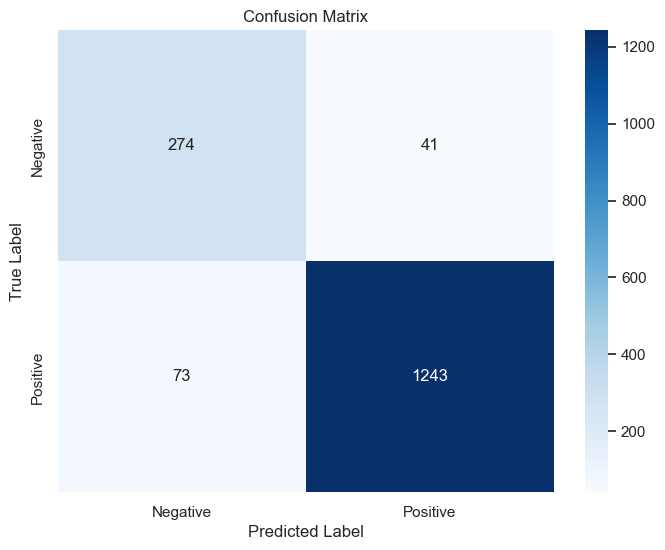


--- Visualizing Decision Boundary ---
Note: Visualizing a 3D decision boundary is complex.
We will visualize a 2D slice of the boundary by fixing one feature to its median value.
Plotting 'Symptom_Count' vs 'Comorbidity_Count', with 'Exposure_Count' fixed at 2.00


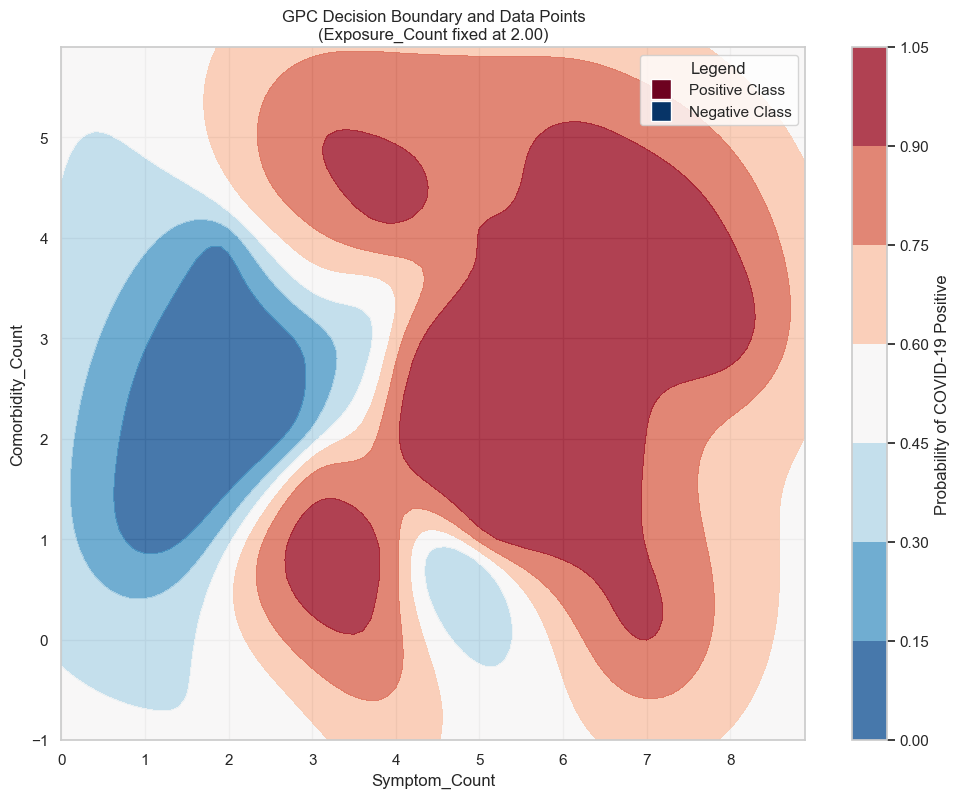

In [134]:
# --- 4. Model Evaluation ---

print("\n--- Model Evaluation ---")
y_pred = gpc.predict(X_test)

# Print metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Visualize Confusion Matrix
import seaborn as sns

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# --- 5. Visualize Decision Boundary (Enhanced) ---

print("\n--- Visualizing Decision Boundary ---")
print("Note: Visualizing a 3D decision boundary is complex.")
print("We will visualize a 2D slice of the boundary by fixing one feature to its median value.")

# Import for custom legend
from matplotlib.lines import Line2D
import pandas as pd

# Select features to plot and the feature to fix
feature_1_name = 'Symptom_Count'
feature_2_name = 'Comorbidity_Count'
fixed_feature_name = 'Exposure_Count'

# Fix the third feature to its median value from the training set
fixed_feature_val = X_train[fixed_feature_name].median()
print(f"Plotting '{feature_1_name}' vs '{feature_2_name}', with '{fixed_feature_name}' fixed at {fixed_feature_val:.2f}")

# Create a finer mesh grid for a smoother plot
x_min, x_max = X_train[feature_1_name].min() - 1, X_train[feature_1_name].max() + 1
y_min, y_max = X_train[feature_2_name].min() - 1, X_train[feature_2_name].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), # Reduced step for a smoother grid
                     np.arange(y_min, y_max, 0.1))

# Create a DataFrame with all grid points and the fixed feature value
grid_df = pd.DataFrame({feature_1_name: xx.ravel(), feature_2_name: yy.ravel()})
grid_df[fixed_feature_name] = fixed_feature_val

# Ensure column order is the same as in the training data
predict_input_df = grid_df[X_train.columns]

# Predict the probabilities on the grid
Z = gpc.predict_proba(predict_input_df)[:, 1]
Z = Z.reshape(xx.shape)

# --- Plotting ---
plt.figure(figsize=(12, 9))

# Plot the probability contour
contour = plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu_r, alpha=0.8)
plt.colorbar(contour, label="Probability of COVID-19 Positive")

# Create a custom, more descriptive legend
legend_elements = [
    # Create proxy artists for class colors
    Line2D([0], [0], marker='s', color='w', label='Positive Class',
           markerfacecolor=plt.cm.RdBu_r(0.99), markersize=15, linestyle='None'),
    Line2D([0], [0], marker='s', color='w', label='Negative Class',
           markerfacecolor=plt.cm.RdBu_r(0.01), markersize=15, linestyle='None')
]
plt.legend(handles=legend_elements, title="Legend", loc="upper right")

plt.xlabel(feature_1_name)
plt.ylabel(feature_2_name)
plt.title(f'GPC Decision Boundary and Data Points\n({fixed_feature_name} fixed at {fixed_feature_val:.2f})')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()



--- Visualizing Decision Boundary Grid by Exposure Risk Level ---


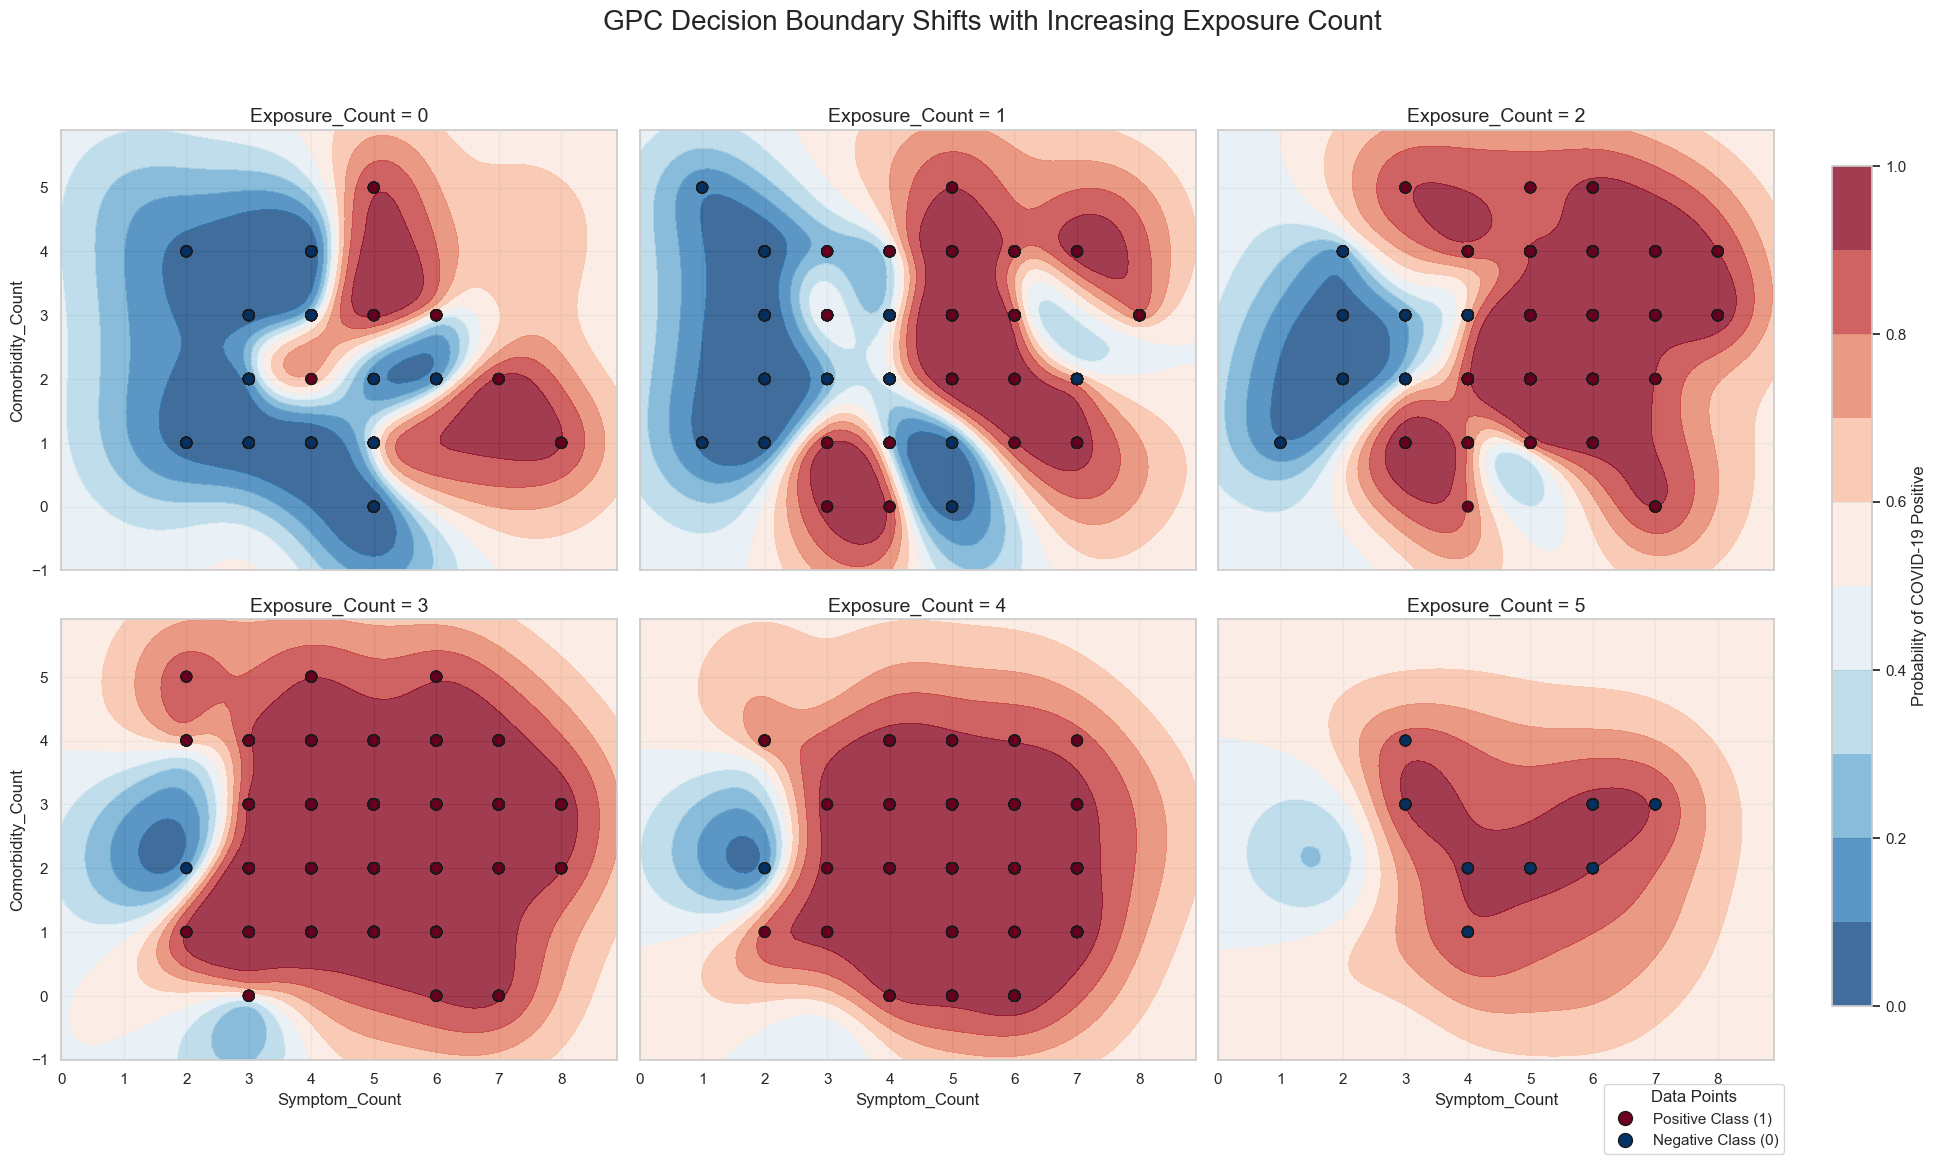

In [137]:
# --- 7. Grid Visualization of Decision Boundaries by Exposure Risk ---

print("\n--- Visualizing Decision Boundary Grid by Exposure Risk Level ---")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D

# --- Assuming 'gpc', 'X_train', 'y_train' are pre-loaded ---

# 1. Set up the plot grid (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(20, 12), sharex=True, sharey=True)
# Flatten the 2x3 grid of axes into a 1D array for easy looping
axes = axes.ravel()

# Define the features for the axes and the feature to iterate over
feature_1_name = 'Symptom_Count'
feature_2_name = 'Comorbidity_Count'
fixed_feature_name = 'Exposure_Count'
exposure_levels = range(6) # An array from 0 to 5

# 2. Create a single meshgrid for all plots to ensure consistent axes
# Use a fine step for a smooth probability contour
x_min, x_max = X_train[feature_1_name].min() - 1, X_train[feature_1_name].max() + 1
y_min, y_max = X_train[feature_2_name].min() - 1, X_train[feature_2_name].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# 3. Loop through each exposure level and create a subplot
for i, level in enumerate(exposure_levels):
    ax = axes[i]

    # Create a DataFrame with all grid points, fixing the exposure risk level
    grid_df = pd.DataFrame({feature_1_name: xx.ravel(), feature_2_name: yy.ravel()})
    grid_df[fixed_feature_name] = level
    predict_input_df = grid_df[X_train.columns]

    # Predict the probabilities on the grid for the current level
    Z = gpc.predict_proba(predict_input_df)[:, 1]
    Z = Z.reshape(xx.shape)

    # Plot the probability contour on the current subplot
    # Using a fixed set of levels ensures the color scale is consistent
    contour = ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu_r, alpha=0.8, levels=np.linspace(0, 1, 11))

    # Filter and plot the actual training data points that have this exposure level
    train_slice = X_train[X_train[fixed_feature_name] == level]
    y_slice = y_train[X_train[fixed_feature_name] == level]
    ax.scatter(train_slice[feature_1_name], train_slice[feature_2_name], c=y_slice,
               cmap=plt.cm.RdBu_r, edgecolors='k', s=60)

    # Set the title for each subplot
    ax.set_title(f'{fixed_feature_name} = {level}', fontsize=14)

    # Set axis labels only on the outer plots to reduce clutter
    if i // 3 == 1:  # Bottom row
        ax.set_xlabel(feature_1_name, fontsize=12)
    if i % 3 == 0:  # Left-most column
        ax.set_ylabel(feature_2_name, fontsize=12)

# 4. Finalize the overall figure
# Add a single, descriptive title for the entire grid
fig.suptitle('GPC Decision Boundary Shifts with Increasing Exposure Count', fontsize=20)

# Adjust layout to prevent titles/labels from overlapping
fig.tight_layout(rect=[0, 0.05, 0.9, 0.95])

# Add a single, shared colorbar for all subplots
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(contour, cax=cbar_ax, label='Probability of COVID-19 Positive')

# Add a single, shared legend for the class colors
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Positive Class (1)',
           markerfacecolor=plt.cm.RdBu_r(0.99), markeredgecolor='k', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Negative Class (0)',
           markerfacecolor=plt.cm.RdBu_r(0.01), markeredgecolor='k', markersize=10)
]
fig.legend(handles=legend_elements, loc='lower right', bbox_to_anchor=(0.9, 0.02), title="Data Points")

plt.show()


#### Summary GPC

- Model Accuracy (`0.9595`): An accuracy of `95.95%` on the test set is excellent. It indicates that the model generalized well from the training data and successfully captured the non-linear relationship between the features.

- Optimized Kernel (`8.54**2 * RBF(length_scale=1.05)`): This is arguably the most critical hyperparameter in the RBF kernel. It defines the "reach" or "influence" of a single training point.

    - `length_scale=1.05`: Value of 1.05 suggests the model found a balance. The decision boundary is non-linear and moderately complex, meaning the outcome can change fairly quickly as feature values change, but it's not excessively erratic.
    - `8.54**2`: This constant (~72.9) scales the overall variance of the Gaussian Process. A larger value indicates that the model has learned that the range of probabilities can vary widely across the feature space. It has adjusted itself to be confident in its predictions (pushing probabilities closer to 0 or 1).

- Log-Marginal-Likelihood (`-646.581`):

    - What it is: The Log-Marginal-Likelihood (LML) is the objective function that the GPC maximizes to find the best kernel hyperparameters. Think of it as a measure of how well the model (with its optimized kernel) "explains" the observed training data.
    - Interpretation: A higher LML is better. While the absolute value `-646.581` isn't directly interpretable on its own, it is the peak of the "fitness landscape" that the optimizer found. 

### 8.2 XGBoost (eXtreme Gradient Boosting)

**Core Concept**:  
Advanced implementation of gradient boosted decision trees optimized for speed and performance.

#### Key Characteristics:
1. **Regularization**:
   - L1 (Lasso) and L2 (Ridge) regularization terms
   - Reduces overfitting by penalizing complex models
   
2. **Handling Missing Values**:
   - Automatically learns imputation directions
   - No need for separate missing value treatment

3. **Parallel Processing**:
   - Builds trees in parallel (unlike traditional GBM)
   - Optimized for multi-core CPUs

4. **Tree Pruning**:
   - Uses depth-first approach
   - Continues splitting until max_depth then prunes backward

5. **Custom Loss Functions**:
   - Supports user-defined objective functions
   - Built-in metrics for classification/regression

6. **Feature Importance**:
   - Provides gain-based importance scores
   - Tracks how often features are used in splits

**Best For**:
- Large datasets with complex patterns
- Competitions and production environments
- When feature importance interpretation is needed

#### Model Training

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Symptom Count: Total number of key COVID-19 symptoms
clean_df['Symptom_Count'] = clean_df[symptoms].sum(axis=1)

# 2. Comorbidity Count: Total number of pre-existing conditions
clean_df['Comorbidity_Count'] = clean_df[comorbidities].sum(axis=1)

# 3. Exposure Risk Score: A simple sum of exposure-related activities
clean_df['Exposure_Risk'] = clean_df[exposure_factors].sum(axis=1)

print("\nEngineered features created: 'Symptom Count', 'Comorbidity Count', 'Exposure Risk'")
print("DataFrame with engineered features:")
print(clean_df[['Symptom_Count', 'Comorbidity_Count', 'Exposure_Risk', 'COVID-19']].head())


# --- 3. Data Preparation for Model ---
engineered_features = ['Symptom_Count', 'Symptom_Risk', 'Symptom_High_Risk', 'Exposure_Count', 'Exposure_Risk', 'Exposure_High_Risk','Comorbidity_Count', 'Comorbidity_Risk', 'Comorbidity_High_Risk']

X = clean_df[engineered_features]
y = clean_df['COVID-19']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# --- 4. Model Training with XGBoost Classifier ---

print("\n--- Model Training (XGBoost Classifier) ---")

# Instantiate the XGBoost classifier
# use_label_encoder=False and eval_metric='logloss' are good practices for modern XGBoost
xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

print("\nTraining the XGBoost model on the engineered features...")
xgb_clf.fit(X_train, y_train)
print("Model training complete.")


Engineered features created: 'Symptom Count', 'Comorbidity Count', 'Exposure Risk'
DataFrame with engineered features:
   Symptom_Count  Comorbidity_Count  Exposure_Risk  COVID-19
0              5                  5              0         1
1              5                  3              3         1
2              3                  1              0         0
3              7                  3              3         1
4              2                  4              4         0

--- Model Training (XGBoost Classifier) ---

Training the XGBoost model on the engineered features...
Model training complete.


c:\Users\iiezu\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:35:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [127]:
# --- 5. Model Evaluation ---
print("\n--- Model Evaluation (XGBoost) ---")

# Make predictions on the test set
y_pred = xgb_clf.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


# --- 6. Feature Importance ---
print("\n--- Feature Importance (XGBoost) ---")
feature_importances = pd.DataFrame({
    'feature': engineered_features,
    'importance': xgb_clf.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importances)




--- Model Evaluation (XGBoost) ---
Accuracy: 0.9368

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       315
           1       0.97      0.95      0.96      1316

    accuracy                           0.94      1631
   macro avg       0.89      0.91      0.90      1631
weighted avg       0.94      0.94      0.94      1631


Confusion Matrix:
[[ 276   39]
 [  64 1252]]

--- Feature Importance (XGBoost) ---
                 feature  importance
3         Exposure_Count    0.486803
0          Symptom_Count    0.178804
2      Symptom_High_Risk    0.173086
6      Comorbidity_Count    0.066859
5     Exposure_High_Risk    0.055516
8  Comorbidity_High_Risk    0.038932
1           Symptom_Risk    0.000000
4          Exposure_Risk    0.000000
7       Comorbidity_Risk    0.000000


### AdaBoost (Adaptive Boosting)
**Core Concept**:  
Sequential ensemble that reweights misclassified instances to focus on "hard" cases.

#### Key Characteristics:
1. **Instance Reweighting**:
   - Increases weights of misclassified samples
   - Subsequent models focus more on difficult cases

2. **Weak Learners**:
   - Typically uses shallow decision trees (stumps)
   - Can work with any base estimator

3. **Additive Model**:
   - Combines weak learners linearly
   - Final prediction is weighted majority vote

4. **Error-Driven Learning**:
   - Adapts based on classification errors
   - Gives higher influence to more accurate models

5. **Sensitive to Noise**:
   - Noisy data/outliers can distort weights
   - Requires clean data for best performance

6. **Fast Training**:
   - Simpler than XGBoost computationally
   - Fewer hyperparameters to tune

**Best For**:
- Binary classification problems
- When training time is critical
- Simpler datasets without excessive noise


#### Model Training


--- Data Preparation ---

--- Model Training (AdaBoost Classifier) ---
Training the AdaBoost model...
Model training complete.

--- Model Evaluation (AdaBoost) ---
Accuracy: 0.9203

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       315
           1       0.95      0.95      0.95      1316

    accuracy                           0.92      1631
   macro avg       0.87      0.87      0.87      1631
weighted avg       0.92      0.92      0.92      1631


Confusion Matrix:
[[ 251   64]
 [  66 1250]]

--- Visualizing Model Evaluation ---


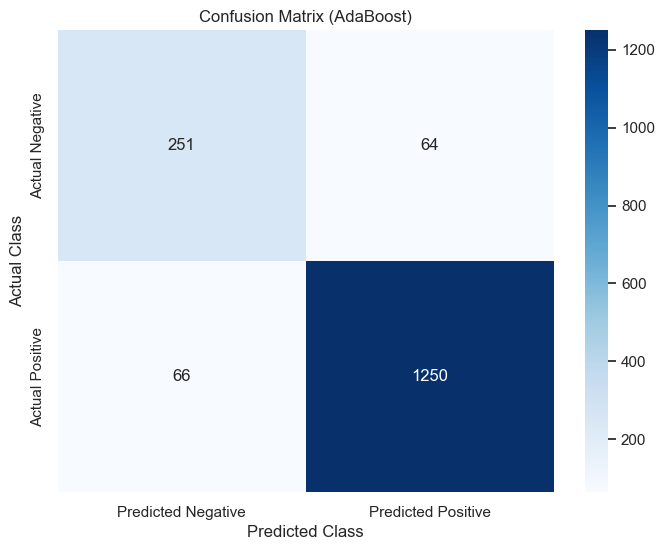

C:\Users\iiezu\AppData\Local\Temp\ipykernel_11452\2223855604.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importances, palette='viridis')


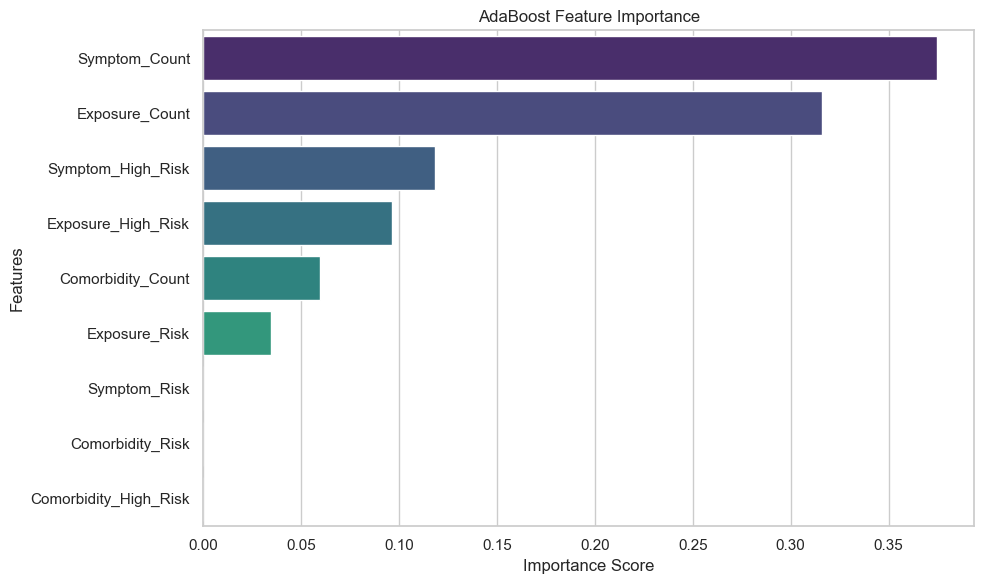


Evaluation visualizations have been generated.


In [125]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Data Preparation for Model
print("\n--- Data Preparation ---")
engineered_features = ['Symptom_Count', 'Symptom_Risk', 'Symptom_High_Risk', 'Exposure_Count', 'Exposure_Risk', 'Exposure_High_Risk','Comorbidity_Count', 'Comorbidity_Risk', 'Comorbidity_High_Risk']

X = clean_df[engineered_features]
y = clean_df['COVID-19']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


# 3. Model Training with AdaBoost Classifier
print("\n--- Model Training (AdaBoost Classifier) ---")
# Instantiate the AdaBoost classifier. By default, it uses a DecisionTreeClassifier as the base estimator.
ada_clf = AdaBoostClassifier(random_state=42)

print("Training the AdaBoost model...")
ada_clf.fit(X_train, y_train)
print("Model training complete.")

# 4. Model Evaluation (Numerical)
print("\n--- Model Evaluation (AdaBoost) ---")
y_pred = ada_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# 5. Model Evaluation (Visual)
print("\n--- Visualizing Model Evaluation ---")

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix (AdaBoost)')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# Plotting Feature Importances
feature_importances = pd.DataFrame({
    'feature': engineered_features,
    'importance': ada_clf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances, palette='viridis')
plt.title('AdaBoost Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

print("\nEvaluation visualizations have been generated.")


## **9.0 Model Fine Tuning**

### 9.1 Using XgBoost and AdaBoost Feature Importance


--- Model Training (Gaussian Process Classifier) ---

Training the GPC model on the engineered features...
Model training complete.

--- Model Evaluation ---
Accuracy: 0.9209

Classification Report:
              precision    recall  f1-score   support

    Negative       0.77      0.84      0.80       315
    Positive       0.96      0.94      0.95      1316

    accuracy                           0.92      1631
   macro avg       0.87      0.89      0.88      1631
weighted avg       0.92      0.92      0.92      1631


Confusion Matrix:


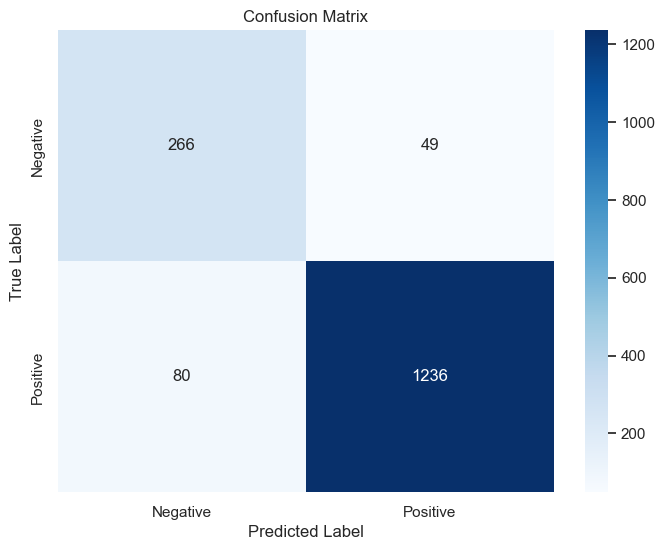


--- Visualizing Decision Boundary ---
Note: Visualizing a 3D decision boundary is complex.
We will visualize a 2D slice of the boundary by fixing one feature to its median value.
Plotting 'Symptom_Count' vs 'Exposure_Count', with 'Symptom_High_Risk' fixed at 1.00


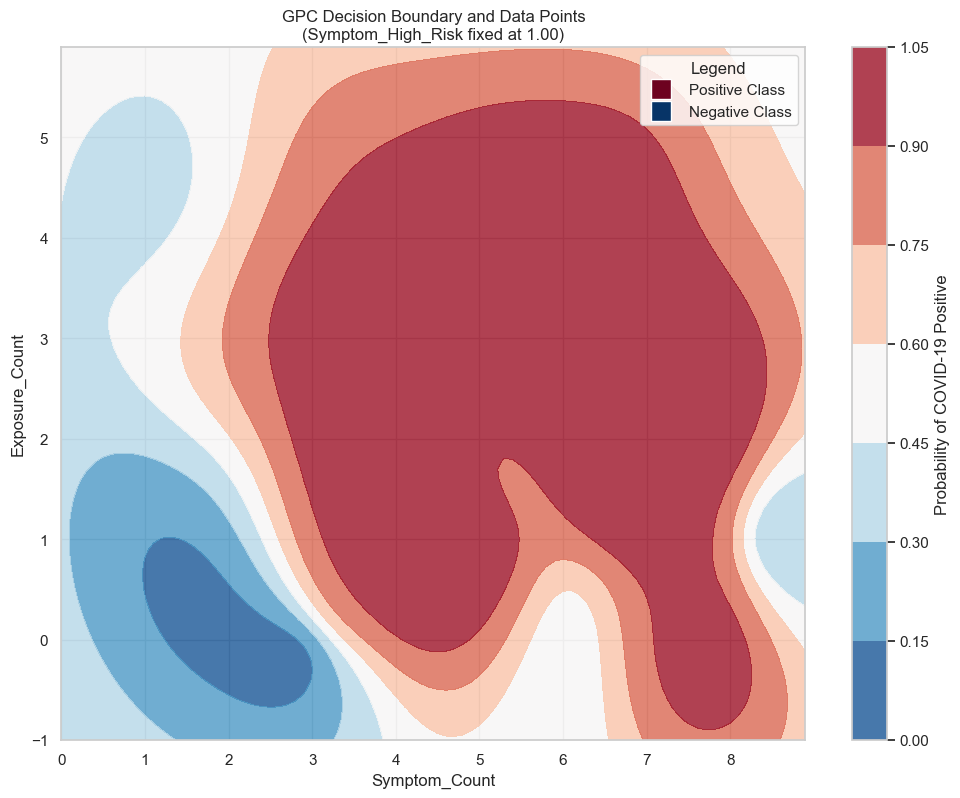

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("\n--- Model Training (Gaussian Process Classifier) ---")

engineered_features = ['Symptom_Count', 'Symptom_High_Risk', 'Exposure_Count']
X = clean_df[engineered_features]
y = clean_df['COVID-19']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))
gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)

print("\nTraining the GPC model on the engineered features...")
gpc.fit(X_train, y_train)
print("Model training complete.")

# --- 4. Model Evaluation ---

print("\n--- Model Evaluation ---")
y_pred = gpc.predict(X_test)

# Print metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Visualize Confusion Matrix
import seaborn as sns

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# --- 5. Visualize Decision Boundary (Enhanced) ---

print("\n--- Visualizing Decision Boundary ---")
print("Note: Visualizing a 3D decision boundary is complex.")
print("We will visualize a 2D slice of the boundary by fixing one feature to its median value.")

# Import for custom legend
from matplotlib.lines import Line2D
import pandas as pd

# Select features to plot and the feature to fix
feature_1_name = 'Symptom_Count'
feature_2_name = 'Exposure_Count'
fixed_feature_name = 'Symptom_High_Risk'

# Fix the third feature to its median value from the training set
fixed_feature_val = X_train[fixed_feature_name].max()
print(f"Plotting '{feature_1_name}' vs '{feature_2_name}', with '{fixed_feature_name}' fixed at {fixed_feature_val:.2f}")

# Create a finer mesh grid for a smoother plot
x_min, x_max = X_train[feature_1_name].min() - 1, X_train[feature_1_name].max() + 1
y_min, y_max = X_train[feature_2_name].min() - 1, X_train[feature_2_name].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), # Reduced step for a smoother grid
                     np.arange(y_min, y_max, 0.1))

# Create a DataFrame with all grid points and the fixed feature value
grid_df = pd.DataFrame({feature_1_name: xx.ravel(), feature_2_name: yy.ravel()})
grid_df[fixed_feature_name] = fixed_feature_val

# Ensure column order is the same as in the training data
predict_input_df = grid_df[X_train.columns]

# Predict the probabilities on the grid
Z = gpc.predict_proba(predict_input_df)[:, 1]
Z = Z.reshape(xx.shape)

# --- Plotting ---
plt.figure(figsize=(12, 9))

# Plot the probability contour
contour = plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu_r, alpha=0.8)
plt.colorbar(contour, label="Probability of COVID-19 Positive")

# Create a custom, more descriptive legend
legend_elements = [
    # Create proxy artists for class colors
    Line2D([0], [0], marker='s', color='w', label='Positive Class',
           markerfacecolor=plt.cm.RdBu_r(0.99), markersize=15, linestyle='None'),
    Line2D([0], [0], marker='s', color='w', label='Negative Class',
           markerfacecolor=plt.cm.RdBu_r(0.01), markersize=15, linestyle='None')
]
plt.legend(handles=legend_elements, title="Legend", loc="upper right")

plt.xlabel(feature_1_name)
plt.ylabel(feature_2_name)
plt.title(f'GPC Decision Boundary and Data Points\n({fixed_feature_name} fixed at {fixed_feature_val:.2f})')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()



--- Visualizing Decision Boundary Grid by Exposure Risk Level ---


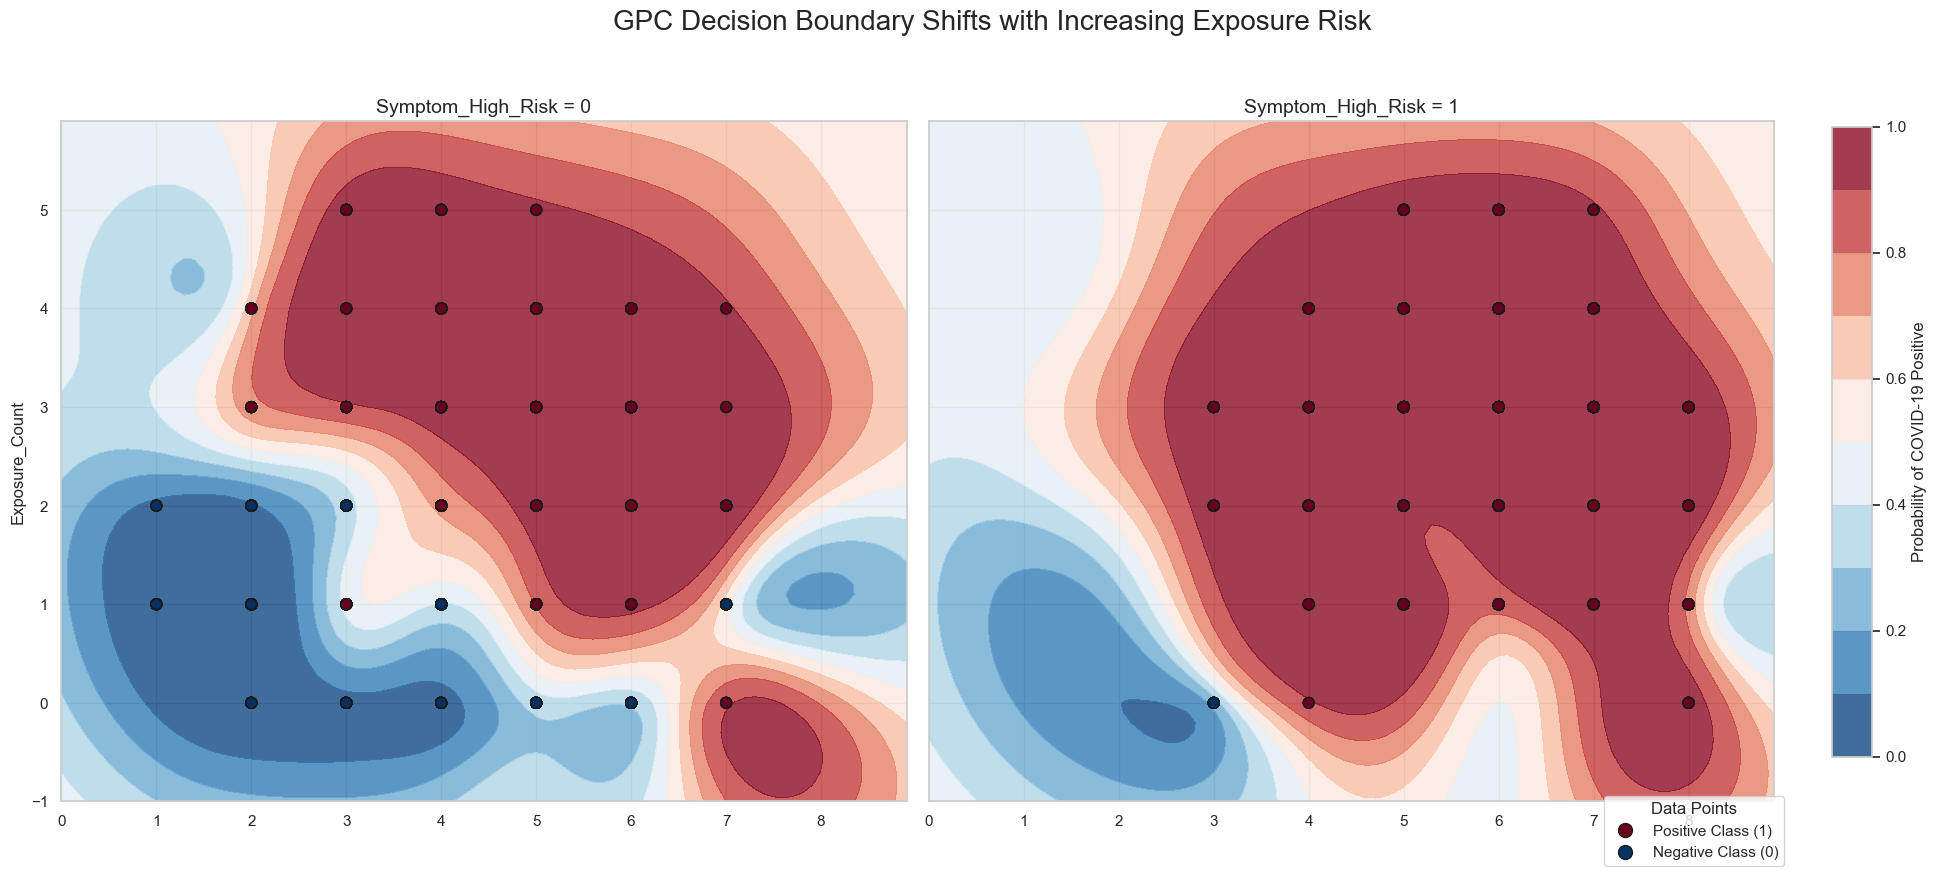

In [143]:
# --- 7. Grid Visualization of Decision Boundaries by Exposure Risk ---

print("\n--- Visualizing Decision Boundary Grid by Exposure Risk Level ---")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D

# --- Assuming 'gpc', 'X_train', 'y_train' are pre-loaded ---

# 1. Set up the plot grid (2 rows, 3 columns)
fig, axes = plt.subplots(1, 2, figsize=(20, 9), sharex=True, sharey=True)
# Flatten the 2x3 grid of axes into a 1D array for easy looping
axes = axes.ravel()

# Define the features for the axes and the feature to iterate over
feature_1_name = 'Symptom_Count'
feature_2_name = 'Exposure_Count'
fixed_feature_name = 'Symptom_High_Risk'
symptoms_levels = range(2) # An array from 0 to 5

# 2. Create a single meshgrid for all plots to ensure consistent axes
# Use a fine step for a smooth probability contour
x_min, x_max = X_train[feature_1_name].min() - 1, X_train[feature_1_name].max() + 1
y_min, y_max = X_train[feature_2_name].min() - 1, X_train[feature_2_name].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# 3. Loop through each exposure level and create a subplot
for i, level in enumerate(symptoms_levels):
    ax = axes[i]

    # Create a DataFrame with all grid points, fixing the exposure risk level
    grid_df = pd.DataFrame({feature_1_name: xx.ravel(), feature_2_name: yy.ravel()})
    grid_df[fixed_feature_name] = level
    predict_input_df = grid_df[X_train.columns]

    # Predict the probabilities on the grid for the current level
    Z = gpc.predict_proba(predict_input_df)[:, 1]
    Z = Z.reshape(xx.shape)

    # Plot the probability contour on the current subplot
    # Using a fixed set of levels ensures the color scale is consistent
    contour = ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu_r, alpha=0.8, levels=np.linspace(0, 1, 11))

    # Filter and plot the actual training data points that have this exposure level
    train_slice = X_train[X_train[fixed_feature_name] == level]
    y_slice = y_train[X_train[fixed_feature_name] == level]
    ax.scatter(train_slice[feature_1_name], train_slice[feature_2_name], c=y_slice,
               cmap=plt.cm.RdBu_r, edgecolors='k', s=60)

    # Set the title for each subplot
    ax.set_title(f'{fixed_feature_name} = {level}', fontsize=14)

    # Set axis labels only on the outer plots to reduce clutter
    if i // 3 == 1:  # Bottom row
        ax.set_xlabel(feature_1_name, fontsize=12)
    if i % 3 == 0:  # Left-most column
        ax.set_ylabel(feature_2_name, fontsize=12)

# 4. Finalize the overall figure
# Add a single, descriptive title for the entire grid
fig.suptitle('GPC Decision Boundary Shifts with Increasing Exposure Risk', fontsize=20)

# Adjust layout to prevent titles/labels from overlapping
fig.tight_layout(rect=[0, 0.05, 0.9, 0.95])

# Add a single, shared colorbar for all subplots
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(contour, cax=cbar_ax, label='Probability of COVID-19 Positive')

# Add a single, shared legend for the class colors
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Positive Class (1)',
           markerfacecolor=plt.cm.RdBu_r(0.99), markeredgecolor='k', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Negative Class (0)',
           markerfacecolor=plt.cm.RdBu_r(0.01), markeredgecolor='k', markersize=10)
]
fig.legend(handles=legend_elements, loc='lower right', bbox_to_anchor=(0.9, 0.02), title="Data Points")

plt.show()
